In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#os.chdir(r'D:\MSBA Notes\DSC5106\assignments\project\version4')
h=pd.read_csv('SG_Firms_OnlyTS.csv',index_col=[0,2])

# Section 1: Data Cleaning with Linear Interpolation  
Only take the columns listed below from the whole dataset 

In [85]:
h=h[['Market Capitalization Fiscal Period End',
'Accounts Receivables Days',
'Accounts Receivables Days 5 Year Average',
'Auditors Opinion',
'Cash & Short Term Investments',
'Cash',
'Cash Dividends Paid Total',
'Cash Flow/Sales',
'Dividend Yield 5 Year Average High',
'Dividend Yield 5 Year Average Low',
'EBIT/Total Interest Expense Ratio',
'Equity 1 Year Annual Growth',
'Funds From Operations',
'Interest Expense On Debt',
'Income Taxes',
'Gross Profit Margin',
'Gross Profit Margin 5 Year Average',
'Long Term Borrowings',
'Length Of Fiscal Year',
'Long Term Liabilities Per Share',
'Market Capitalization',
'Long Term Debt % Common Equity',
'Net Sales Or Revenues',
'Operating Expenses Total',
'Net Income After Preferred Dividends (Basic EPS)',
'Net Income 3 Year Annual Growth',
'Net Debt',
'Preferred Stock % Total Capital',
'Pretax Margin',
'Price/Earnings Ratio 5 Year Average Average High-Low',
'Price/Sales Per Share Ratio',
'Return On Equity Total %',
'Return On Assets',
'Return On Assets 5 Year Average',
'Return On Equity Per Share',
'Total Debt',
'Total Debt % Total Capital',
'Total Liabilities',
'Common Shares Outstanding',
'Free Cash Flow Per Share',
'Total Assets']]

In [86]:
print(h.columns)
print(h.shape)

Index(['Market Capitalization Fiscal Period End', 'Accounts Receivables Days',
       'Accounts Receivables Days 5 Year Average', 'Auditors Opinion',
       'Cash & Short Term Investments', 'Cash', 'Cash Dividends Paid Total',
       'Cash Flow/Sales', 'Dividend Yield 5 Year Average High',
       'Dividend Yield 5 Year Average Low',
       'EBIT/Total Interest Expense Ratio', 'Equity 1 Year Annual Growth',
       'Funds From Operations', 'Interest Expense On Debt', 'Income Taxes',
       'Gross Profit Margin', 'Gross Profit Margin 5 Year Average',
       'Long Term Borrowings', 'Length Of Fiscal Year',
       'Long Term Liabilities Per Share', 'Market Capitalization',
       'Long Term Debt % Common Equity', 'Net Sales Or Revenues',
       'Operating Expenses Total',
       'Net Income After Preferred Dividends (Basic EPS)',
       'Net Income 3 Year Annual Growth', 'Net Debt',
       'Preferred Stock % Total Capital', 'Pretax Margin',
       'Price/Earnings Ratio 5 Year Average Averag

In [87]:
h.to_csv('reduced.csv')
h1 = h

In [88]:
## dropping all rows where all x variables are NaN ##

h1 = h1.dropna(how='all')

In [89]:
h1.to_csv('reduced1.csv')
#h1.head(10)

In [90]:
## transforming column headers to be able to handle in pandas ##

h1.columns = h1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('&', '_').str.replace('%', 'pct')

In [91]:
h1.columns

Index(['market_capitalization_fiscal_period_end', 'accounts_receivables_days',
       'accounts_receivables_days_5_year_average', 'auditors_opinion',
       'cash___short_term_investments', 'cash', 'cash_dividends_paid_total',
       'cash_flow/sales', 'dividend_yield_5_year_average_high',
       'dividend_yield_5_year_average_low',
       'ebit/total_interest_expense_ratio', 'equity_1_year_annual_growth',
       'funds_from_operations', 'interest_expense_on_debt', 'income_taxes',
       'gross_profit_margin', 'gross_profit_margin_5_year_average',
       'long_term_borrowings', 'length_of_fiscal_year',
       'long_term_liabilities_per_share', 'market_capitalization',
       'long_term_debt_pct_common_equity', 'net_sales_or_revenues',
       'operating_expenses_total',
       'net_income_after_preferred_dividends_basic_eps',
       'net_income_3_year_annual_growth', 'net_debt',
       'preferred_stock_pct_total_capital', 'pretax_margin',
       'price/earnings_ratio_5_year_average_aver

In [92]:
h1['qualified'] = 0
h1['unqualified'] = 0
h1['notaudited'] = 0
hunqual = {'Unqualified': '1','Qualified': '0','Not audited': '0'}
hqual = {'Qualified': '1','Unqualified': '0','Not audited': '0'}
hnoaudit = {'Not audited': '1','Unqualified': '0','Qualified': '0'}
h1['qualified'] = h1['auditors_opinion'].replace(hqual)
h1['unqualified'] = h1['auditors_opinion'].replace(hunqual)
h1['notaudited'] = h1['auditors_opinion'].replace(hnoaudit)
h1=h1.drop("auditors_opinion", axis=1)

In [93]:
h1.head(10)

market_capitalization_fiscal_period_end  \
Worldscope Permanent ID Year                                           
C702B7140               2000                                   59708   
                        2001                                   59708   
                        2002                                   39805   
                        2003                                  121729   
                        2004                                   86232   
                        2005                                   48375   
                        2006                                   96926   
                        2007                                   59000   
                        2008                                    6321   
                        2009                                   21271   

                             accounts_receivables_days  \
Worldscope Permanent ID Year                             
C702B7140               2000                       NaN   
                        2001                       155   
                        2002                       126   
                        2003                       111   
                        2004                        84   
                        2005                        99   
                        2006                        74   
                        2007                        97   
                        2008                       107   
                        2009                       133   

                             accounts_receivables_days_5_year_average  \
Worldscope Permanent ID Year                                            
C702B7140               2000                                      NaN   
                        2001                                      NaN   
                        2002                                      NaN   
                        2003                                      NaN   
                        2004                                      NaN   
                        2005                                      115   
                        2006                                       99   
                        2007                                       93   
                        2008                                       92   
                        2009                                      102   

                             cash___short_term_investments   cash  \
Worldscope Permanent ID Year                                        
C702B7140               2000                         17333  14962   
                        2001                         10196   7681   
                        2002                          4890   4091   
                        2003                         11807   8800   
                        2004                         11010  11005   
                        2005                         16444  13191   
                        2006                         16475  13831   
                        2007                          8886   8116   
                        2008                         14359  14358   
                        2009                         18455  18454   

                              cash_dividends_paid_total cash_flow/sales  \
Worldscope Permanent ID Year                                              
C702B7140               2000                        0.0           17.81   
                        2001                     3000.0            4.01   
                        2002                        0.0            5.83   
                        2003                        0.0            6.36   
                        2004                     1997.0           12.59   
                        2005                        0.0            8.26   
                        2006                     2105.0           12.87   
                        2007                     4214.0             7.1   
           

In [94]:
## replacing error message with NaN as well as 0 value in market cap with NaN ##
## converting all columns to numeric ##

h1 = h1.replace('$$ER: 4540,NO DATA VALUES FOUND', np.nan)
h1 = h1.apply(pd.to_numeric)
h1['market_capitalization_fiscal_period_end'] = h1['market_capitalization_fiscal_period_end'].replace(0, np.nan)

In [95]:
## after removing error message, converting y variable to numeric ##

#h1["market_capitalization_fiscal_period_end"] = h1["market_capitalization_fiscal_period_end"].apply(pd.to_numeric)

In [96]:
## the below code deals with filling in the NaN values inside the y variable ##

In [97]:
## first choice: filling in the mean for the companies ##

#hmean["market_capitalization_fiscal_period_end"] = h1.groupby("Worldscope Permanent ID").transform(lambda x: x.fillna(x.mean()))
#hmean.to_csv('reducedmean.csv')

In [98]:
## second choice: interpolating the missing values ##

In [99]:
hpol = h1.groupby('Worldscope Permanent ID').transform(lambda x: x.fillna(x.interpolate(method = 'linear')))
## need to round the dummy variables for auditor opinion to either 0 or 1 ##


In [100]:
hpol['qualified'] = hpol['qualified'].apply(lambda x: round(x, 0))
hpol['unqualified'] = hpol['unqualified'].apply(lambda x: round(x, 0))
hpol['notaudited'] = hpol['notaudited'].apply(lambda x: round(x, 0))

In [101]:
hpol.to_csv('reducedpol.csv')

In [102]:
hpol = hpol.dropna(subset=['market_capitalization_fiscal_period_end'])

In [103]:
hpol.to_csv('reducedpol1.csv')

In [104]:
hpol2 = hpol.apply(np.sqrt)
hpol2.columns = hpol.columns + "_rt"
hpol2 = hpol2.drop(['qualified_rt', 'unqualified_rt', 'notaudited_rt', 'market_capitalization_fiscal_period_end_rt'], axis=1)

In [105]:
hpol3 = hpol.apply(np.square)
hpol3.columns = hpol.columns + "_sq"
hpol3.head(10)
hpol3 = hpol3.drop(['qualified_sq', 'unqualified_sq', 'notaudited_sq', 'market_capitalization_fiscal_period_end_sq'], axis=1)

In [106]:
hpol = pd.concat([hpol, hpol2, hpol3], axis=1)

In [107]:
#hpol['market_capitalization_fiscal_period_end'] = hpol['market_capitalization_fiscal_period_end'].apply(np.log)

In [108]:
hpol.to_csv('reducedpol1.csv')

# Section 2: Varible selection  
## Section 2.1: Filter method 
Variables are filtered and take only the subset of the relevant features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

In [109]:
## identify highly correlated columns to our y variable ##
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

 
hpol=pd.read_csv('reducedpol1.csv',index_col=[0,1])
print(hpol.head(5))
print(hpol.shape)

                              market_capitalization_fiscal_period_end  \
Worldscope Permanent ID Year                                            
C702B7140               2000                                  59708.0   
                        2001                                  59708.0   
                        2002                                  39805.0   
                        2003                                 121729.0   
                        2004                                  86232.0   

                              accounts_receivables_days  \
Worldscope Permanent ID Year                              
C702B7140               2000                        NaN   
                        2001                      155.0   
                        2002                      126.0   
                        2003                      111.0   
                        2004                       84.0   

                              accounts_receivables_days_5_year_average  \


In [110]:
#Loading the dataset without rt/sq transformation for columns. othersise too many co-linearity
hpol=hpol[hpol.columns[0:43]]

#'market_capitalization_fiscal_period_end' and 'market_capitalization' is the same thing, 
hpol=hpol.drop("market_capitalization", axis=1)

#print(h.head(5))
print(hpol.columns)
print(hpol.shape)

Index(['market_capitalization_fiscal_period_end', 'accounts_receivables_days',
       'accounts_receivables_days_5_year_average',
       'cash___short_term_investments', 'cash', 'cash_dividends_paid_total',
       'cash_flow/sales', 'dividend_yield_5_year_average_high',
       'dividend_yield_5_year_average_low',
       'ebit/total_interest_expense_ratio', 'equity_1_year_annual_growth',
       'funds_from_operations', 'interest_expense_on_debt', 'income_taxes',
       'gross_profit_margin', 'gross_profit_margin_5_year_average',
       'long_term_borrowings', 'length_of_fiscal_year',
       'long_term_liabilities_per_share', 'long_term_debt_pct_common_equity',
       'net_sales_or_revenues', 'operating_expenses_total',
       'net_income_after_preferred_dividends_basic_eps',
       'net_income_3_year_annual_growth', 'net_debt',
       'preferred_stock_pct_total_capital', 'pretax_margin',
       'price/earnings_ratio_5_year_average_average_high-low',
       'price/sales_per_share_ratio',

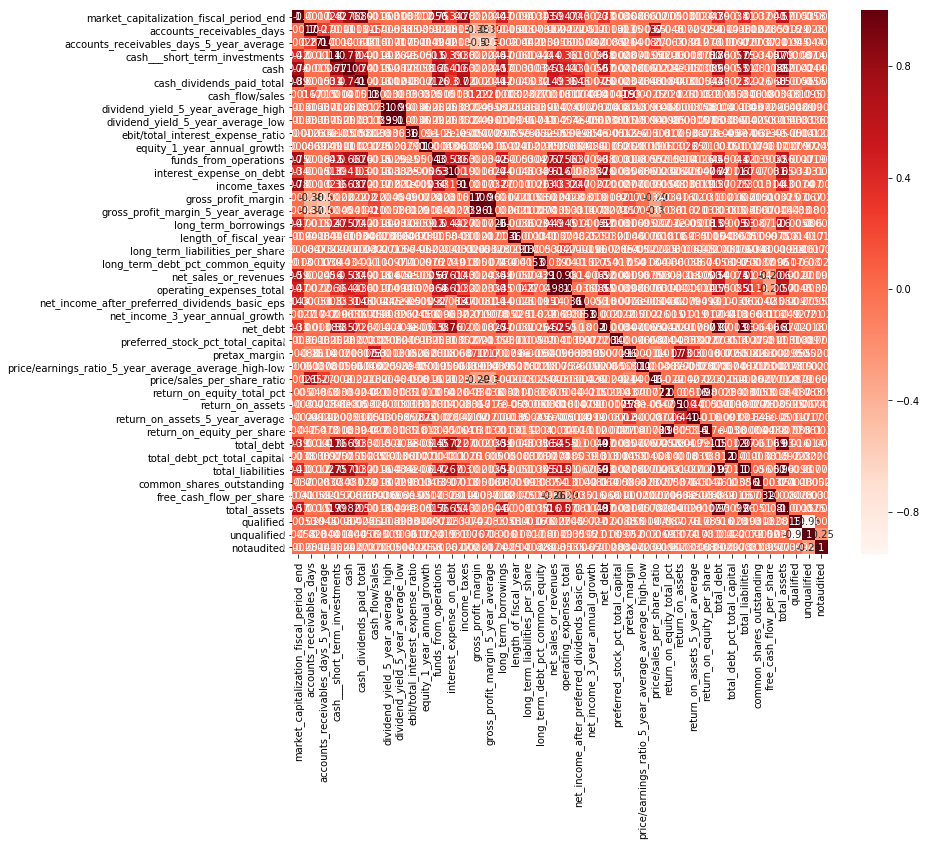

market_capitalization_fiscal_period_end    1.000000
cash                                       0.757542
cash_dividends_paid_total                  0.890748
funds_from_operations                      0.751938
income_taxes                               0.781713
net_sales_or_revenues                      0.594006
total_assets                               0.573174
Name: market_capitalization_fiscal_period_end, dtype: float64
7


In [111]:
yvar='market_capitalization_fiscal_period_end'
xvar=hpol.drop("market_capitalization_fiscal_period_end", 1)

plt.figure(figsize=(12,10))
cor = hpol.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["market_capitalization_fiscal_period_end"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)
print(len(relevant_features))

In [114]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Loading the dataset
#os.chdir(r'D:\MSBA Notes\DSC5106\assignments\project\version4')
df=pd.read_csv('reducedpol1.csv',index_col=[0,1])
print(df.shape)
reg=ols('market_capitalization_fiscal_period_end ~ cash + funds_from_operations + cash_dividends_paid_total + cash+income_taxes + net_sales_or_revenues + total_assets', data=df, missing='drop').fit()
print(reg.summary())

(16103, 121)
                                       OLS Regression Results                                      
Dep. Variable:     market_capitalization_fiscal_period_end   R-squared:                       0.870
Model:                                                 OLS   Adj. R-squared:                  0.870
Method:                                      Least Squares   F-statistic:                 1.659e+04
Date:                                     Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                                             17:34:50   Log-Likelihood:            -3.0619e+05
No. Observations:                                    14820   AIC:                         6.124e+05
Df Residuals:                                        14813   BIC:                         6.124e+05
Df Model:                                                6                                         
Covariance Type:                                 nonrobust                             

## Section 2.2: Wrapper Method
Backward elimination is used here. Feed all the possible features to the model at first, check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range. The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [115]:
#Loading the dataset
hpol=pd.read_csv('reducedpol1.csv',index_col=[0,1])
print(hpol.head(5))
print(hpol.shape)

                              market_capitalization_fiscal_period_end  \
Worldscope Permanent ID Year                                            
C702B7140               2000                                  59708.0   
                        2001                                  59708.0   
                        2002                                  39805.0   
                        2003                                 121729.0   
                        2004                                  86232.0   

                              accounts_receivables_days  \
Worldscope Permanent ID Year                              
C702B7140               2000                        NaN   
                        2001                      155.0   
                        2002                      126.0   
                        2003                      111.0   
                        2004                       84.0   

                              accounts_receivables_days_5_year_average  \


In [116]:
#'market_capitalization_fiscal_period_end' and 'market_capitalization' is the same thing, 
print(hpol.shape)
#for backward elimination to work, no null value for exogenous variable is acceptable. 
hpol=hpol.dropna()
hpol=hpol.drop("market_capitalization", axis=1)
#print(h.head(5))
#print(hpol.columns)
print(hpol.shape)

yvar=hpol['market_capitalization_fiscal_period_end']
xvar=hpol.drop("market_capitalization_fiscal_period_end", 1)
#Backward Elimination
import pandas as pd
import numpy as np
import statsmodels.api as sm
cols = list(xvar.columns)
pmax = 1
#print(cols)

(16103, 121)
(986, 120)


In [117]:
while (len(cols)>0):
    p= []
    X = xvar[cols]
    #Adding constant column of ones, mandatory for sm.OLS model
    X_1 = sm.add_constant(X)
    model = sm.OLS(yvar,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
print(len(selected_features_BE))

['cash___short_term_investments', 'cash', 'cash_dividends_paid_total', 'funds_from_operations', 'interest_expense_on_debt', 'income_taxes', 'long_term_borrowings', 'long_term_liabilities_per_share', 'net_sales_or_revenues', 'operating_expenses_total', 'net_income_after_preferred_dividends_basic_eps', 'net_debt', 'pretax_margin', 'return_on_equity_per_share', 'total_liabilities', 'common_shares_outstanding', 'free_cash_flow_per_share', 'accounts_receivables_days_rt', 'accounts_receivables_days_5_year_average_rt', 'cash_rt', 'interest_expense_on_debt_rt', 'income_taxes_rt', 'long_term_borrowings_rt', 'length_of_fiscal_year_rt', 'market_capitalization_rt', 'operating_expenses_total_rt', 'preferred_stock_pct_total_capital_rt', 'pretax_margin_rt', 'total_debt_rt', 'total_liabilities_rt', 'free_cash_flow_per_share_rt', 'total_assets_rt', 'accounts_receivables_days_sq', 'accounts_receivables_days_5_year_average_sq', 'cash___short_term_investments_sq', 'cash_sq', 'cash_flow/sales_sq', 'funds_f

## Section 2.3: Combination of F-stat and t-stat
Using t-sat for variable selection and F-stat for model selection 

In [118]:
#Loading the dataset
hpol=pd.read_csv('reducedpol1.csv',index_col=[0,1])
print(hpol.head(5))
print(hpol.shape)

                              market_capitalization_fiscal_period_end  \
Worldscope Permanent ID Year                                            
C702B7140               2000                                  59708.0   
                        2001                                  59708.0   
                        2002                                  39805.0   
                        2003                                 121729.0   
                        2004                                  86232.0   

                              accounts_receivables_days  \
Worldscope Permanent ID Year                              
C702B7140               2000                        NaN   
                        2001                      155.0   
                        2002                      126.0   
                        2003                      111.0   
                        2004                       84.0   

                              accounts_receivables_days_5_year_average  \


In [119]:
#'market_capitalization_fiscal_period_end' and 'market_capilization' is the same thing
#hpol=hpol.drop("market_capitalization", axis=1)
#hpol=hpol.drop("market_capitalization_rt", axis=1)
#hpol=hpol.drop("market_capitalization_sq", axis=1)


#print(h.head(5))
hpol.columns = hpol.columns.str.strip().str.lower().str.replace('&', '').str.replace('%', 'pert')
#print(hpol.columns)
#print(hpol.shape)

# we only ran the model on the comination of variables that got selected from the above two methods
yvar='market_capitalization_fiscal_period_end'

modeleq = yvar + ' ~'
for xvar in ('accounts_receivables_days',
             'cash___short_term_investments',
             'cash', 'cash_dividends_paid_total',
             'dividend_yield_5_year_average_high',
             'funds_from_operations',
             'interest_expense_on_debt',
             'income_taxes',
             'long_term_borrowings',
             'net_sales_or_revenues',
             'operating_expenses_total',
             'net_income_after_preferred_dividends_basic_eps',
             'net_debt',
             'pretax_margin',
             'total_liabilities',
             'common_shares_outstanding',
             'free_cash_flow_per_share',
             'qualified',
             #'market_capitalization_fiscal_period_end_rt',
             'accounts_receivables_days_rt',
             'accounts_receivables_days_5_year_average_rt',
             'cash___short_term_investments_rt',
             'cash_rt',
             'equity_1_year_annual_growth_rt',
             'interest_expense_on_debt_rt',
             'income_taxes_rt',
             'long_term_borrowings_rt',
             'long_term_liabilities_per_share_rt',
             #'market_capitalization_rt',
             'operating_expenses_total_rt',
             'net_income_after_preferred_dividends_basic_eps_rt',
             'preferred_stock_pct_total_capital_rt',
             'pretax_margin_rt',
             'total_debt_rt',
             'total_liabilities_rt',
             #'market_capitalization_fiscal_period_end_sq',
             'accounts_receivables_days_sq',
             'accounts_receivables_days_5_year_average_sq',
             'cash___short_term_investments_sq',
             'cash_sq',
             'dividend_yield_5_year_average_high_sq',
             'funds_from_operations_sq',
             'interest_expense_on_debt_sq',
             'income_taxes_sq',
             'gross_profit_margin_5_year_average_sq',
             'long_term_borrowings_sq',
             'long_term_liabilities_per_share_sq',
             'net_sales_or_revenues_sq',
             'operating_expenses_total_sq',
             'net_income_after_preferred_dividends_basic_eps_sq',
             'net_income_3_year_annual_growth_sq',
             'net_debt_sq',
             'preferred_stock_pct_total_capital_sq',
             'pretax_margin_sq',
             'return_on_equity_total_pct_sq',
             'total_debt_sq',
             'total_liabilities_sq',
             'common_shares_outstanding_sq',
             'free_cash_flow_per_share_sq',
             'total_assets',
             'total_assets_sq',
             'total_assets_rt'):
 
    
    if modeleq[-1] == '~':
        modeleq = modeleq + ' ' + xvar
    else:
        modeleq = modeleq + ' + ' + xvar
print(modeleq)

market_capitalization_fiscal_period_end ~ accounts_receivables_days + cash___short_term_investments + cash + cash_dividends_paid_total + dividend_yield_5_year_average_high + funds_from_operations + interest_expense_on_debt + income_taxes + long_term_borrowings + net_sales_or_revenues + operating_expenses_total + net_income_after_preferred_dividends_basic_eps + net_debt + pretax_margin + total_liabilities + common_shares_outstanding + free_cash_flow_per_share + qualified + accounts_receivables_days_rt + accounts_receivables_days_5_year_average_rt + cash___short_term_investments_rt + cash_rt + equity_1_year_annual_growth_rt + interest_expense_on_debt_rt + income_taxes_rt + long_term_borrowings_rt + long_term_liabilities_per_share_rt + operating_expenses_total_rt + net_income_after_preferred_dividends_basic_eps_rt + preferred_stock_pct_total_capital_rt + pretax_margin_rt + total_debt_rt + total_liabilities_rt + accounts_receivables_days_sq + accounts_receivables_days_5_year_average_sq + c

In [120]:
# as the F test p value is small in this case, we use the F-value directly 
import statsmodels.api as sm
from statsmodels.formula.api import ols

bmodeleq=modeleq
if True :
    print('Variable Selection using p-value & PR(>F):')
    maxfv = 0.0

    while True :
        #Specify C() for Categorical, else could be interpreted as numeric:
        #hout=ols('resale_price ~ floor_area_sqm + C(flat_type)', data=h).fit()
        hout=ols(modeleq, data=hpol, missing='drop').fit()
        if modeleq.find(' + ') == -1 :
            # 1 xvar left
            break

        #print(dir(hout)) gives all the attributes of .fit(), e.g. .fvalue & .f_pvalue
        fv=hout.fvalue
        fpv=hout.f_pvalue
        if fv > maxfv :
            maxfv=fv
            bmodeleq=modeleq
        print('\nF-statistic =',hout.fvalue,'       PR(>F) =',fpv)

        prf = sm.stats.anova_lm(hout, typ=3)['PR(>F)']
        maxp=max(prf[1:])
        
        #print('\n',dict(prf))

        xdrop = prf[maxp==prf].axes[0][0] # 1st element of row-label .axes[0]
        if xdrop.find('Intercept') != -1 :
            break

        # xdrop removed from model equation:
        if (modeleq.find('~ ' + xdrop + ' + ') != -1): 
            modeleq = modeleq.replace('~ ' + xdrop + ' + ','~ ') 
        elif (modeleq.find('+ ' + xdrop + ' + ') != -1): 
            modeleq = modeleq.replace('+ ' + xdrop + ' + ','+ ')
        else:
            modeleq = modeleq.replace(' + ' + xdrop,'') 
        print('Model equation:',modeleq,'\n')

        print('Variable to drop:',xdrop,'       p-value =',prf[xdrop])
        #print('\nVariable left:\n'+str(prf[maxp!=prf][:-1]),'\n')
    
    print('\nF-statistic =',hout.fvalue,'       PR(>F) =',hout.f_pvalue)
    print('Variable left:\n'+str(prf[maxp!=prf][:-1]),'\n')
    #input("found intercept")
    print('Best model equation:',bmodeleq)
    print('Maxmimum f value =',maxfv,'\n')
    
hout=ols(bmodeleq, data=hpol).fit()

#print(sm.stats.anova_lm(hout, typ=1))
#print(anova) # Anova table with 'Treatment' broken up
hsum=hout.summary()

print('\n',hsum)

Variable Selection using p-value & PR(>F):

F-statistic = 12394.016282526598        PR(>F) = 0.0
Model equation: market_capitalization_fiscal_period_end ~ accounts_receivables_days + cash___short_term_investments + cash + cash_dividends_paid_total + dividend_yield_5_year_average_high + funds_from_operations + interest_expense_on_debt + income_taxes + long_term_borrowings + net_sales_or_revenues + operating_expenses_total + net_income_after_preferred_dividends_basic_eps + net_debt + pretax_margin + total_liabilities + free_cash_flow_per_share + qualified + accounts_receivables_days_rt + accounts_receivables_days_5_year_average_rt + cash___short_term_investments_rt + cash_rt + equity_1_year_annual_growth_rt + interest_expense_on_debt_rt + income_taxes_rt + long_term_borrowings_rt + long_term_liabilities_per_share_rt + operating_expenses_total_rt + net_income_after_preferred_dividends_basic_eps_rt + preferred_stock_pct_total_capital_rt + pretax_margin_rt + total_debt_rt + total_liabilitie


F-statistic = 14789.508723094808        PR(>F) = 0.0
Model equation: market_capitalization_fiscal_period_end ~ accounts_receivables_days + cash___short_term_investments + cash_dividends_paid_total + dividend_yield_5_year_average_high + funds_from_operations + interest_expense_on_debt + income_taxes + long_term_borrowings + net_sales_or_revenues + operating_expenses_total + net_income_after_preferred_dividends_basic_eps + net_debt + pretax_margin + total_liabilities + free_cash_flow_per_share + qualified + accounts_receivables_days_rt + cash___short_term_investments_rt + cash_rt + equity_1_year_annual_growth_rt + interest_expense_on_debt_rt + income_taxes_rt + long_term_borrowings_rt + long_term_liabilities_per_share_rt + operating_expenses_total_rt + net_income_after_preferred_dividends_basic_eps_rt + preferred_stock_pct_total_capital_rt + pretax_margin_rt + total_debt_rt + total_liabilities_rt + accounts_receivables_days_sq + cash___short_term_investments_sq + cash_sq + dividend_yiel


F-statistic = 15266.693443850943        PR(>F) = 0.0
Model equation: market_capitalization_fiscal_period_end ~ accounts_receivables_days + cash___short_term_investments + cash_dividends_paid_total + dividend_yield_5_year_average_high + funds_from_operations + interest_expense_on_debt + income_taxes + long_term_borrowings + net_sales_or_revenues + operating_expenses_total + net_income_after_preferred_dividends_basic_eps + net_debt + total_liabilities + free_cash_flow_per_share + cash___short_term_investments_rt + equity_1_year_annual_growth_rt + interest_expense_on_debt_rt + income_taxes_rt + long_term_borrowings_rt + operating_expenses_total_rt + net_income_after_preferred_dividends_basic_eps_rt + pretax_margin_rt + total_debt_rt + total_liabilities_rt + accounts_receivables_days_sq + cash___short_term_investments_sq + cash_sq + dividend_yield_5_year_average_high_sq + funds_from_operations_sq + interest_expense_on_debt_sq + income_taxes_sq + gross_profit_margin_5_year_average_sq + lon


F-statistic = 16228.490859652416        PR(>F) = 0.0
Model equation: market_capitalization_fiscal_period_end ~ cash___short_term_investments + cash_dividends_paid_total + dividend_yield_5_year_average_high + funds_from_operations + interest_expense_on_debt + income_taxes + long_term_borrowings + net_sales_or_revenues + operating_expenses_total + net_income_after_preferred_dividends_basic_eps + net_debt + total_liabilities + free_cash_flow_per_share + cash___short_term_investments_rt + equity_1_year_annual_growth_rt + interest_expense_on_debt_rt + income_taxes_rt + long_term_borrowings_rt + operating_expenses_total_rt + net_income_after_preferred_dividends_basic_eps_rt + total_liabilities_rt + accounts_receivables_days_sq + cash___short_term_investments_sq + cash_sq + funds_from_operations_sq + interest_expense_on_debt_sq + income_taxes_sq + long_term_borrowings_sq + long_term_liabilities_per_share_sq + net_sales_or_revenues_sq + operating_expenses_total_sq + net_income_after_preferred


F-statistic = 9946.000518848447        PR(>F) = 0.0
Model equation: market_capitalization_fiscal_period_end ~ cash_dividends_paid_total + funds_from_operations + interest_expense_on_debt + income_taxes + long_term_borrowings + net_sales_or_revenues + operating_expenses_total + net_income_after_preferred_dividends_basic_eps + net_debt + total_liabilities + free_cash_flow_per_share + cash___short_term_investments_rt + interest_expense_on_debt_rt + income_taxes_rt + long_term_borrowings_rt + operating_expenses_total_rt + total_liabilities_rt + cash___short_term_investments_sq + cash_sq + funds_from_operations_sq + interest_expense_on_debt_sq + income_taxes_sq + long_term_liabilities_per_share_sq + net_sales_or_revenues_sq + net_income_after_preferred_dividends_basic_eps_sq + net_debt_sq + total_debt_sq + total_liabilities_sq + free_cash_flow_per_share_sq + total_assets + total_assets_sq + total_assets_rt 

Variable to drop: cash___short_term_investments        p-value = 0.566962248081922


F-statistic = 14657.127783119013        PR(>F) = 0.0
Model equation: market_capitalization_fiscal_period_end ~ cash_dividends_paid_total + funds_from_operations + income_taxes + net_sales_or_revenues + operating_expenses_total + net_income_after_preferred_dividends_basic_eps + free_cash_flow_per_share + cash___short_term_investments_rt + income_taxes_rt + long_term_borrowings_rt + total_liabilities_rt + cash_sq + funds_from_operations_sq + interest_expense_on_debt_sq + income_taxes_sq + net_income_after_preferred_dividends_basic_eps_sq + net_debt_sq + total_liabilities_sq + total_assets + total_assets_rt 

Variable to drop: free_cash_flow_per_share_sq        p-value = 3.4235159396704174e-42

F-statistic = 15539.936122550353        PR(>F) = 0.0
Model equation: market_capitalization_fiscal_period_end ~ cash_dividends_paid_total + funds_from_operations + income_taxes + net_sales_or_revenues + operating_expenses_total + net_income_after_preferred_dividends_basic_eps + free_cash_flow_per_s

## Section 2.4: Other models by using different methods for imputation 
By accomodation prof's code, we tried different imputation methods: based on average, and creating dummies (0,1). 
Also, ols model was ran with the assumption that null values are missing by random and dropped. 
We also tried models with different selection criteria, mainly AIC, Adjusted R2, etc. 
The parameter selected are similar and the model shown above has a higher F values, and reflects the nature of the problem better based on financial models
We will use this model for predictions. 

Fit  Logit-  0: one run, 1: PR(>F), 2: Adj R2, 3: BIC, 4: AIC
Fit Probit-  5: one run, 6: PR(>F), 7: Adj R2, 8: BIC, 9: AIC (default: 2)? 2

Versions: conda 4.7.11 jupyter-notebook 6.0.0 IPython 7.6.1 Python 3.7.3 numpy 1.16.4 pandas 0.24.2 scipy 1.2.1
          statsmodels.api 0.10.0

"D:\MSBA Notes\DSC5106\assignments\project" is the current folder.
Trying to read data file...
Index(['market_capitalization_fiscal_period_end', 'accounts_receivables_days',
       'accounts_receivables_days_5_year_average',
       'cash__short_term_investments', 'cash', 'cash_dividends_paid_total',
       'cash_flow/sales', 'dividend_yield_5_year_average_high',
       'dividend_yield_5_year_average_low',
       'ebit/total_interest_expense_ratio', 'equity_1_year_annual_growth',
       'funds_from_operations', 'interest_expense_on_debt', 'income_taxes',
       'gross_profit_margin', 'gross_profit_margin_5_year_average',
       'long_term_borrowings', 'length_of_fiscal_year',
       'long_term_liabilities

931 missing values in operating_expenses_total filled by column average: 24027990.594232365
New (dummy) column operating_expenses_total_miss inserted, with '1's for rows with missing values.
1 missing values in net_income_after_preferred_dividends_basic_eps filled by column average: 1385215.409949389
New (dummy) column net_income_after_preferred_dividends_basic_eps_miss inserted, with '1's for rows with missing values.
4116 missing values in net_income_3_year_annual_growth filled by column average: 17.54241168198267
New (dummy) column net_income_3_year_annual_growth_miss inserted, with '1's for rows with missing values.
9 missing values in net_debt filled by column average: 32985050.551222675
New (dummy) column net_debt_miss inserted, with '1's for rows with missing values.
17 missing values in preferred_stock_pert_total_capital filled by column average: 0.10624088718645718
New (dummy) column preferred_stock_pert_total_capital_miss inserted, with '1's for rows with missing values.
89 m

rsquared_adj = 0.8483567778034741  using 10 df(s) and 10 Xs.
Variable to drop: long_term_debt_pert_common_equity_miss        p-value = 0.9074326609590513
Variable to add: net_sales_or_revenues

rsquared_adj = 0.858896012661357  using 10 df(s) and 10 Xs.
Variable to drop: funds_from_operations        p-value = 0.5589282623517359
Variable to add: net_sales_or_revenues_miss

rsquared_adj = 0.8589346468844504  using 10 df(s) and 10 Xs.
Variable to drop: net_sales_or_revenues_miss        p-value = 0.028869171136733995
Variable to add: operating_expenses_total

rsquared_adj = 0.859842017789935  using 10 df(s) and 10 Xs.
Variable to drop: interest_expense_on_debt        p-value = 0.0001046104983365025
Variable to add: operating_expenses_total_miss

rsquared_adj = 0.859712355928556  using 10 df(s) and 10 Xs.
Variable to drop: operating_expenses_total_miss        p-value = 0.7778562494674751
Variable to add: net_income_after_preferred_dividends_basic_eps

rsquared_adj = 0.8611442099373552  usin

                                          Results: Ordinary least squares
Model:                      OLS                                            Adj. R-squared:            0.863      
Dependent Variable:         market_capitalization_fiscal_period_end        AIC:                       669894.4734
Date:                       2019-11-18 18:37                               BIC:                       669979.0958
No. Observations:           16203                                          Log-Likelihood:            -3.3494e+05
Df Model:                   10                                             F-statistic:               1.018e+04  
Df Residuals:               16192                                          Prob (F-statistic):        0.00       
R-squared:                  0.863                                          Scale:                     5.2801e+16 
-----------------------------------------------------------------------------------------------------------------
              

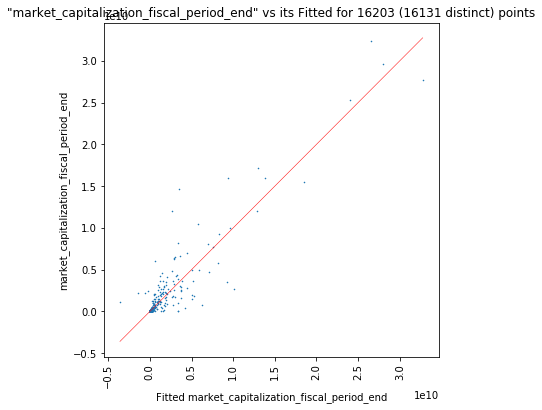


If a warning message with peach background appeared, the below model size should probably be reduced by at least 1.

Practical 'market_capitalization_fiscal_period_end' (median=171244) model's 5 X-coefficients' t-stat ranked, via rsquared_adj (=0.8575290507521898):
                           Coefficient      t-stat
cash_dividends_paid_total    35.008000  122.274650
income_taxes                  6.782528   50.455055
net_sales_or_revenues         0.722276   22.342998
total_liabilities             0.034372   18.045496
operating_expenses_total     -0.508087  -14.855654


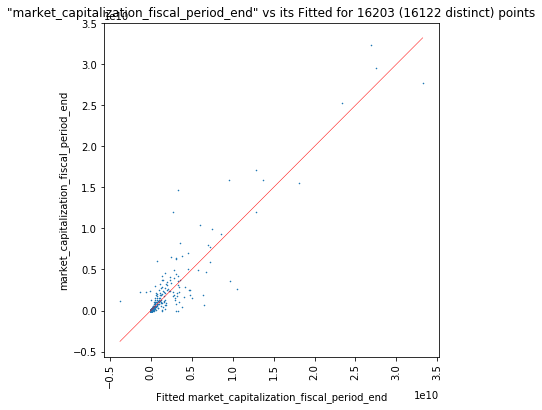

Program took 0.46 mins.


In [1]:
import time; stm = time.time()
import os #; print('os', os.__version__)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf #; print('statsmodels.formula.api', smf.__version__)
import numpy as np
import re #http://docs.python.org/3.8/library/re.html
import scipy

#following line needs to be commented out for production code, unlike breakpoint() == import pdb; pdb.set_trace()
#import pdb #whenever need to set breakpoint for debugging:; pdb.set_trace().  use breakpoint() for Python 3.7 onwards
#http://docs.python.org/3/library/pdb.html

import IPython
import sys
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 31em; }</style>")) #31=ideal height of window? else too short for square plots
import matplotlib.pyplot as pl
%matplotlib inline
pl.rcParams["figure.figsize"] = [6.000, 6.145] #for square plot when x & y have identical ranges (else slightly off-square)
#! pip freeze #version numbers of all the many modules in environment
#http://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter
#http://github.com/googlesamples/assistant-sdk-python/issues/236 #using --user to solve permission problem
#http://stackoverflow.com/questions/51115744/access-is-denied-when-trying-to-pip-install-a-package-on-windows

if not sys.warnoptions:
    import warnings
    #suppress warning messages (those with peach background)
    warnings.simplefilter('ignore')
    warnings.filterwarnings('ignore')

def addx(modeleqt, modeleq):
    #add any extra X variable from the exta pool modeleqt:
    if len(modeleqt) > 0:
        pn = modeleqt.find('+',2)
        if pn == -1:
            print('Final variable to add:', modeleqt[3:])
            modeleq = modeleq + modeleqt
            modeleqt = ''
        else:
            print('Variable to add:', modeleqt[3:pn-1])
            modeleq = modeleq + modeleqt[:pn-1]
            modeleqt = modeleqt[pn-1:]
        #print('\nmodeleq:',"'"+modeleq+"'")
        #print('modeleqt:',"'"+modeleqt+"'")
    return modeleqt, modeleq
    
def tmodeq(modeleq, h):
    #test to see if all variables in model equation are in the data matrix h
    keepmod = modeleq
    vl = list(h)
    psn = modeleq.find('~')
    vy = modeleq[:psn-1]
    modeleq = '+' + modeleq[psn+1:]
    if vy not in vl:
        print('\nY-variable', vy, 'not among the data matrix column names:')
        print(vl)
        return False
    
    while True:
        psn = modeleq.find('+', 2)
        if psn == -1:
            vx = modeleq[2:]
        else:
            vx = modeleq[2:psn-1]
        if vx not in vl:
            print('\nX-variable', vx, 'not among the data matrix column names:')
            print(vl)
            return False
        
        elif psn == -1:
            #print('All variables in the model equation are found in the data matrix:')
            #print(keepmod)
            #print('\nHalting program because something else might be wrong!')
            return True
            
        else:
            modeleq = modeleq[psn:]
            continue
            
def anovatable(uq,selection,nbest,crit,bval,hlm):
    #display ANOVA table
    #ANOVA table not available for logistic regression
    if uq != 2: #number of unique Y values not 2
        pgd = min(hlm['PR(>F)'][1:-1]) > 0
        if selection:
            print('\nBest',nbest,"X-coefficients'",'PR(>F)' if pgd else 'F-stat',
                  '(including categorical variables) ranked, via',crit,'(='+str(abs(bval)) +'):')
        else:
            print('\n'+str(nbest),"X-coefficients'",'PR(>F)' if pgd else 'F-stat','(including categorical variables) ranked:')
        if pgd:
            df=pd.DataFrame(hlm['PR(>F)'][1:-1].sort_values(0, ascending=True)) # 0 is column number
            df.columns = ['PR(>F)']
        else:
            df=pd.DataFrame(hlm['F'][1:-1].sort_values(0, ascending=False)) # 0 is column number
            df.columns = ['F-stat']
        print(df)

def yvsf(x, y, csv=False):
    #plot y vs fit; optionally write to csv
    yhat = x
    if len(yhat.index) != len(y.index):
        print('\n' + str(len(y.index) - len(yhat.index)), 'of', len(y.index), 'points have no fittedvalues.')
    y = y.loc[yhat.index] #not all yvar rows have valid fitted values
    yhat.rename('Fitted ' + y.name, inplace=True)
    nr = yhat.shape[0]
    if len(set(y.dropna())) > 1 and len(set(yhat.dropna())) > 1:
        s, i = np.polyfit(yhat, y, 1) #s=slope, i=intercept; for best-fit 1-degree polynomial
        a, b = min(yhat), max(yhat)
        #the line below can be theoretically misleading if used for multiple regression,
        #    since it does not represent the fitting process
        pl.plot([a, b], i + [s * a, s * b], color='red', linewidth=0.5) #plot best-fit line; increase linewidth for darker line
    nq = np.unique(np.swapaxes(np.vstack((yhat, y)),0,1), axis=0).shape[0] #number of unique points
    ds = max(5 - np.sqrt(nq)/50, 1) #reduce dot size for large samples
    #regard yhat as weighted sum of Xs (although not constructed as such here), so plot is multiple-regression version of y vs X:
    pl.scatter(yhat, y, s=ds, linewidths=0) #s=size of dots; for a very dense plot, might have to set s=1 for smallest dots
    yn = y.name
    xn = yhat.name
    pl.xlabel(xn)
    pl.ylabel(yn)
    pl.xticks(rotation=90) #make x-axis labels vertical; only necessary for long labels
    r = yhat.corr(y)
    pl.title('"'+yn+'" vs its Fitted for ' +str(nr)+ (' (' +str(nq)+ ' distinct)' if nr!=nq else '')+ ' points')
             #+('' if r != r else ' with r=' + str(round(r, 5))))
    pl.show()
    
    if csv:
        #write yhat & y into csv file for Excel:
        fn = xn + '_' + yn + '.csv'
        try:
            #if any statement in this block fails, the 'except:' block will be executed
            if(os.path.exists(fn)):
                os.remove(fn)
            #in the order preferred by Excel for plotting:
            pd.concat([yhat, y], axis=1, copy=False
                     ).reindex(y.index).rename_axis('row label' if y.index.name == None else y.index.name, axis=0).to_csv(fn)
            print('"' + fn + '" written to "' + os.getcwd() + '".')
        except:
            print('"' + fn + '" cannot be written to "' + os.getcwd() + '" since it is being used by another process.')
    
def mr(selection = False, crit = 'PR(>F)', logprob = 'lgt'):
    #Multiple or Logistic regression with variable selection
    
    #data rows order does not matter
    
    #for debugging compatibility issues:
    a = ! jupyter-notebook --version
    v = ! conda --version
    #explore .short_version
    print('\nVersions:', str(v)[str(v).find('conda'):-2]+' jupyter-notebook', str(a)[2:-2]
          +' IPython', ".".join(map(str, IPython.version_info[:3]))+' Python', ".".join(map(str, sys.version_info[:3]))
          +' numpy', np.__version__ +' pandas', pd.__version__+ ' scipy', scipy.__version__)
    try:
        print(' '*9, 'statsmodels.api', sm.__version__)
        sv = 1 #preferred software version
    except:
        #for Azure server:
        print(' '*9, '...with older version of statsmodels.api')
        sv = 0
    
    if 'h' in vars() or 'h' in globals():
        del h #delete h if defined during previous run
    if 'hout' in vars() or 'hout' in globals():
        del hout
    if 'fn' in vars() or 'fn' in globals():
        del fn
    if 'yvar' in vars() or 'yvar' in globals():
        del yvar
        
    #read in one dataset from among the choices below, or specify a new data set; set the Y variable:
    
    #>>>>>>>> ENTER DATA HERE:
    
    if os.getcwd()[:3] == 'C:\\'or 'D:\\':
        os.chdir(r'D:\MSBA Notes\DSC5106\assignments\project') #omit this if data file is in the same folder as this program
    
    #next line not necessary when running on Azure server, but data file must then be uploaded to the same folder
    #os.chdir(r"D:\Documents\Teach\data") #change to data folder as necessary
    print('\n"'+os.getcwd()+'" is the current folder.')
    
    try:
        print('Trying to read data file...')
        #specify data file and y variable:
    
        #h = pd.read_csv("HDB_Data.csv") #case-insensitive
        #yvar = "resale_price" #Case-Sensitive
        
        h = pd.read_csv("reducedpol_modified.csv") #specifying 1st column as row labels (called 'index')
        h.columns = h.columns.str.strip().str.lower().str.replace('&', '').str.replace('%', 'pert')
        print(h.columns)
        
        yvar = "market_capitalization_fiscal_period_end"
     
        
        if not 'h' in vars():
            fn = input('Data file name (case-insensitive): ').strip()
            fn3 = fn[-fn[::-1].find('.'):][:3]
            if fn3 == 'xls':
                h = pd.read_excel(fn)
            elif fn3 == 'csv':
                h = pd.read_csv(fn)
            else:
                print('Neither Excel nor .csv file.')
            if 'h' in vars():
                print('Data file read in.')
                yvar = input('Y-variable name (Case-Sensitive): ').strip()
                print('')
            else:
                print('"' + fn + '" not recognized.  No dataset read in!')
                return False
            
        else:
            print('Data file read in.')
            if not 'yvar' in vars():
                yvar = input('Y-variable name (Case-Sensitive): ').strip()
                print('')
        if yvar == '':
            print('No Y-variable specified!')
            return False
        
    except:
        print('Data file not in current folder?  You may use the line #os.chdir(r"D:\Documents\Teach\data") to change folder.')
        #raise SystemExit
        return False
    
    if (yvar == 'resale_price' or yvar == 'street_name_type_begin') and h.shape[0] > 86461:
        print ('\nHDB_Data.xlsm probably loaded instead of HDB_Data.csv.  Cannot continue!')
        #raise SystemExit
        return False
    
    #h=pd.get_dummies(h.drop(yvar, axis=1), drop_first=True) #turns all categorical variables to indicator/dummy variables
    cn = list(h) #dataset's variable names; also h.head(0); h.head(n) gives variable names & first n rows
    #print(cn,'\n')

    if not yvar in cn:
        print("\n'"+ yvar + "' is not a variable in the dataset.  Cannot continue!")
        return False
    
    print('\nCleaning up', str(len(cn)), 'variable names.', ' This may take time...' if len(cn) > 50 else '')
    #ensure Y name only has alphanumeric and '_', and does not begin with a digit:
    #yvar = ''.join([ c if c.isalnum() else '_' for c in yvar ]) #same as below
    yvar = re.sub('\W', '_', yvar) #replace any non-word character with _
    if yvar[0].isdigit():
        yvar = '_' + yvar        
    
    #should do this after reading the long list of X-variables explicitly requested for
    #clean up variable names:
    for xvar in cn:
        #model variable name must be alphanumeric and '_':
        #xnew = ''.join([ c if c.isalnum() else '_' for c in xvar ]) #same as below
        xnew = re.sub('\W', '_', xvar)
        #model variable name cannot begin with a number:
        if xnew[0].isdigit():
            xnew = '_' + xnew   
        if xvar != xnew:
            h.rename(columns={xvar: xnew}, inplace=True)
    cn = list(h) #column names
    cs = set(h)
    rx = len(cn) - len(cs)
    if rx > 0:
        for x in cs:
            cn.remove(x)
        print('The following', rx, 'column names are repeated!  Cannot continue.')
        print(cn)
        return False
    
    nrow = h.shape[0]
    ncol = h.shape[1]
    print('\nThe original dataset has',nrow,'rows &',ncol,'columns.')
    if ncol < 51:
        print(cn)
    
    #remove rows where Y is missing, or all Xs are missing:
    h=h[h[yvar].notnull()].dropna(how='all', subset=[x for x in list(h) if x != yvar]) #courtesy of Pamela Chan Ting Jun
    #default above would have been how='any', which is more stringent, since dropping rows with 'any' missing values
    #remove rows where Y is not a number; delete empty columns:
    h=h[h[yvar].apply(lambda x: type(x) in [int, np.int64, float, np.float64])].dropna(axis=1, how='all')
    #http://stackoverflow.com/questions/3441358/what-is-the-most-pythonic-way-to-check-if-an-object-is-a-number
    if nrow != h.shape[0] or ncol != h.shape[1]:
        nrow = h.shape[0]
        ncol != h.shape[1]
        cn = list(h)
        print('\nThe current dataset has',nrow,'rows &',ncol,
              'columns, after deleting any rows with missing or non-number Y ('+ yvar +'), or missing all X values,',
             'and any empty columns.')
        if nrow < 3:
            print('Not enough rows to proceed!')
            return False
        
    #number of distinct or unique values in Y:
    uq = len(set(h[yvar].dropna())) # == len(np.unique(h[yvar].dropna()))
    #y median:
    ymed = np.median(h[yvar])
    if ymed == round(ymed) :
        ymed = int(round(ymed))
    print("\nNumber of unique values in Y variable ('"+ yvar + "', with median", str(ymed) + ') =', uq)

    if uq == 2:
        #uq = 3 #for preventing logistic regression
        print('Logistic Regression via','logit' if logprob == 'lgt' else 'probit', 'follows.')
    
    #build model equation:
    modeleq = yvar + ' ~'
    prt1 = True
    catlist = []
    h2 = h[yvar]
    #also possible to directly read all x variables using "for xvar in cn:"
    for xvar in ( 'market_capitalization_fiscal_period_end', 'accounts_receivables_days',
       'accounts_receivables_days_5_year_average',
       'cash__short_term_investments', 'cash', 'cash_dividends_paid_total',
       'cash_flow/sales', 'dividend_yield_5_year_average_high',
       'dividend_yield_5_year_average_low',
       'ebit/total_interest_expense_ratio', 'equity_1_year_annual_growth',
       'funds_from_operations', 'interest_expense_on_debt', 'income_taxes',
       'gross_profit_margin', 'gross_profit_margin_5_year_average',
       'long_term_borrowings', 'length_of_fiscal_year',
       'long_term_liabilities_per_share', 'long_term_debt_pert_common_equity',
       'net_sales_or_revenues', 'operating_expenses_total',
       'net_income_after_preferred_dividends_basic_eps',
       'net_income_3_year_annual_growth', 'net_debt',
       'preferred_stock_pert_total_capital', 'pretax_margin',
       'price/earnings_ratio_5_year_average_average_high-low',
       'price/sales_per_share_ratio', 'return_on_equity_total_pert',
       'return_on_assets', 'return_on_assets_5_year_average',
       'return_on_equity_per_share', 'total_debt',
       'total_debt_pert_total_capital', 'total_liabilities',
       'common_shares_outstanding', 'free_cash_flow_per_share'
        
        ):
        if (xvar[:2] == 'C(') and (xvar[-1] == ')'):
            #specified to be categorical
            xv = xvar[2:-1]
            if xv in cn:
                h[xv] = h[xv].astype('category')
                catlist.append(xv) #xv itself will sometimes be included, causing collinearity; need to remove later
            #    following lines are commented out; instead, convert to dummies after collecting all x variables:
            #    xv_nonull = len(h[xv].notnull())==nrow
            #    xvs = list(set(h[xv]))
            #    h=pd.get_dummies(h) #turns all categorical variables to indicator/dummy variables
            #    #above may turn some other numeric variable into categorical dummies,
            #    #    and then remove the original numeric variable
            #    print(list(h))
            #    for xvsi in xvs[1 if xv_nonull else 0: ]: #if necessary, omit first variable to avoid collinearity
            #        xvsi2=xv+'_'+str(xvsi)
            #        xvsj=xvsi2.replace('.','_') #model variable cannot have name containing '.'
            #        h.rename(columns={xvsi2: xvsj}, inplace=True)
            #        if modeleq[-1] == '~':
            #            modeleq = modeleq + ' ' + xvsj
            #        else:
            #            modeleq = modeleq + ' + ' + xvsj
            #    #cn.remove(xv)
            #    cn=list(h)
        else:
            xv = xvar
        
        if (xv in cn) and (xv != yvar):
            if modeleq[-1] == '~':
                modeleq = modeleq + ' ' + xvar
            else:
                modeleq = modeleq + ' + ' + xvar
            h2=pd.concat([h2,h[xv]],axis=1)
        else:
            if prt1:
                print('')
                prt1=False
            print("Missing '" + xv + "' will be ignored.")

    if modeleq[-1] == '~':
        #no X variable added into model; import directly from dataset:
        print('\nAdding all', str(len(cn)), 'data matrix column names into the model equation.',
              ' This may take time...' if len(cn) > 50 else '')
        for xvar in cn:
            if xvar != yvar:
                if modeleq[-1] == '~':
                    modeleq = modeleq + ' ' + xvar
                else:
                    modeleq = modeleq + ' + ' + xvar
                h2=pd.concat([h2,h[xvar]],axis=1)

    #print('\n'+ modeleq)
    #print(list(h2))
    
    cn3 = list(h)
    if len(catlist) > 0 or uq == 2:
        print('Creating dummy variables...')
        #print('len(catlist) =', len(catlist), '     Specified categorical variable(s):', catlist)
        #turns all categorical variables (excep Y) to indicator/dummy variables, drop the first dummy for each variable:
        h = pd.concat([h2[yvar],pd.get_dummies(h2.drop(yvar, axis=1), drop_first=True)],axis=1)
        #.get_dummies() sometimes create duplicate columns!!  Must delete possible duplicates.
    else:
        h = h2
    del h2 #save computer RAM space
    
    #remove any duplicate columns, and any 'original' variables with categories:
    
    #both of .drop & del remove all occurences of the columns with the same name, so can't work here:
    #    #h.drop(['column_name'], axis = 1, inplace = True, errors = 'ignore')
    #    h=h.drop(onename,axis=1)
    #    del h[onename]
    
    if cn3!=list(h):
        #dummies were added
        #print(list(h))
        while True:
            print('Removing any duplicate column names...')
            cn3=list(h)
            #remove any duplicate columns:
            replist=list(x for n, x in enumerate(cn3) if x in cn3[:n])
            if len(replist)>0:
                onename=replist[0]
                #print(onename,'is a repeated column.')
                posn = list(h).index(onename)
                colrange=[i for i in range(posn)]+[i for i in range(posn+1,len(list(h)))]
                h = h.iloc[:, colrange] #all rows, just colrange columns
            elif len(catlist)>0:
                #remove any original categorical variables already turned into dummies:
                onename=catlist[0]
                #just in case .astype('category') didn't add the original variable
                if not onename in cn3:
                    break
                    
                #print(onename,"is a repeated column from .astype('category').")
                posn = list(h).index(onename)
                colrange=[i for i in range(posn)]+[i for i in range(posn+1,len(list(h)))]
                h = h.iloc[:, colrange] #all rows, just colrange columns
                catlist=catlist[1:]
            else:
                #print('No more repeated column.')
                break

    #remove any numeric variable turned into categorical dummies:
    #tyvar = modeleq[:modeleq.find('~')-1]
    #if not tyvar in cn:
    #    print('\nY variable ('+tyvar+') is no longer in the dataset!')
    #    return False
    #
    #tmod = modeleq[modeleq.find('~')+2:]
    #while len(tmod)>0:
    #    txvar = tmod[:tmod.find('+')-1] if '+' in tmod else tmod
    #    if txvar not in cn:
    #        tpos=modeleq.find(txvar)
    #        modeleq = modeleq[:tpos] + modeleq[tpos+len(txvar)+3:] #remove xvar from model
    #        print('\n"'+txvar+'" removed from model.')
    #    if txvar==tmod:
    #        break
    #    tmod=tmod[tmod.find('+')+2:] #trim xvar on the left
        
    #model variable name cannot contain '.', space, '/',  '-', etc.:
    for xv in list(h):
        #xvs=xv.replace('.','_').replace(' ','_').replace('/','_').replace('-','_')
        #import re
        #xvs=re.sub(r'\W+', '_', xv) # collapse all adjacent non-alphnum into '_'
        xvs = ''.join([ c if c.isalnum() else "_" for c in xv ])
        if xvs != xv:
            h.rename(columns={xv: xvs}, inplace=True)

    #print('final dataset:')
    #print(list(h))
    
    if ncol != h.shape[1]:
        ncol = h.shape[1]
        if not prt1:
            print('')
        print('The dataset for analysis has',nrow,'rows &',ncol,
              'columns, after any conversion of categorical variables to dummy variables.')
        
    if cn!=list(h):    
        cn=list(h)
        #print('gone thru redo of modeleq')
        modeleq = yvar + ' ~'
        for xvar in cn:
            if xvar != yvar:
                if modeleq[-1] == '~':
                    modeleq = modeleq + ' ' + xvar
                else:
                    modeleq = modeleq + ' + ' + xvar

    if modeleq[-1] == '~':
        print('\nThere are no X variables in the model!')
        return False
            
    modx = modeleq.count('+') + 1
    nrow = h.shape[0]
    print('\nModel has',nrow,'rows &',modx,'X variables.')
    if modx < 51:
        print(modeleq)
    
    #delete any X variables with high correlations:
    
    #if h.shape[1] < 105 and h.shape[1] > 2: #52*2 columns
    if h.shape[1] > 2:
        #rth is r threshold
        rth = 0.999999
        #above is barely high enough to preserve transformed X; if this causes collinearity, nan produced will be dealt with
        #if wish to be very stringent:
        #rth = 0.9
        #X variables in correlations > dth will be used for deciding which of 2 highly-correlated Xs to delete:
        dth = 0.7 #decision threshold; possibly modified later
        print('\nChecking for any X pair with correlation >', rth, ' ...')
        c=h.drop(yvar, axis=1).corr() #.corr() sometimes produces 1.0000000000003961
        c[c > 1.0] = 1.0
        c[c < -1.0] = -1.0
        c=abs(c).where(np.triu(np.ones(c.shape), k=1).astype(np.bool)).unstack()
        #sorted list of pairs with highest correlations: 
        c=pd.DataFrame(list(c),list(c.axes[0])).dropna().sort_values([0],kind='mergesort',ascending=False).dropna()
        #delete X variables with correlations > rth :
        modlen=len(modeleq)
        #trying to involve points within top 1/5 of correlations below rth :
        try:
            dth = max(dth, c.iloc[int(max(min((c>=rth)[:].sum()[0] + np.ceil((c<rth)[:].sum()[0]/5),c.shape[0]),1)),0])
        except:
            dth = 0.7
        
        if c.shape[0] > 1 and c.iloc[0,0] > rth:
            #build list of X appearing in correlation > dth:
            tn=[]
            for x in list(c.index.values)[:min(nrow,max(5,sum(list((c>dth).iloc[:,0]))))]:
                tn=tn+(list(x))
            #if tn only has numbers: tc=sorted(tn,key=tn.count,reverse=True)
            nx=[]
            cx=[]
            for x in set(tn):
                nx.append(x)
                cx.append(tn.count(x))
            #xvar ordered by times of appearance in correlations > dth:
            tc=pd.DataFrame(cx,nx).sort_values(0, ascending=False)
            #X variables deletion list:
            dl=[]
            #delete X variables with correlations > rth :
            for i in range(sum(list((c>rth).iloc[:,0]))):
                #neither variable can be Y; and both variables must be in model equation modeleq:
                dc = 0
                for d in list(c.index[i]):
                    if modeleq.find('~ ' +d+ ' + ') != -1 or modeleq.find('+ ' +d+ ' + '
                                                                         ) != -1 or modeleq[-len(d)-3 :] == ' + '+d:
                        dc += 1
                if dc == 2:
                    dv0 = list(c.index[i])[0] #var1
                    dv1 = list(c.index[i])[1] #var2
                    #how often appearing in correlations > dth:
                    dm0 = tc.loc[dv0,0]
                    dm1 = tc.loc[dv1,0]
                    if dm0 == dm1:
                        #missing value counts:
                        dm0 = h[dv0].isnull().sum() + h[dv0].where(h[dv0]==np.inf).count()+h[dv0].where(h[dv0]==-np.inf).count()
                        dm1 = h[dv1].isnull().sum() + h[dv1].where(h[dv1]==np.inf).count()+h[dv1].where(h[dv1]==-np.inf).count()
                        if dm0 == dm1:
                            dm0 = len(dv0)
                            dm1 = len(dv1)
                            if dm0 == dm1:
                                #delete variable with more '_':
                                d = dv0 if dv0.count('_') > dv1.count('_') else dv1
                            else:
                                #delete variable with longer name:
                                d = dv0 if dm0 > dm1 else dv1
                        else:
                            #delete variable with more missing values:
                            d = dv0 if dm0 > dm1 else dv1
                    else:
                        #delete variable appearing more times in correlations > dth:
                        d = dv0 if dm0 > dm1 else dv1
                        
                    if not (d in dl):
                        dl.append(d)
                        print('\ncorr'+str(c.index[i]),'=',c.iloc[i,0])
                        print("'"+d+"' is being deleted.")
                        if modeleq.find('~ ' + d + ' + ') != -1:
                            modeleq = modeleq.replace('~ ' + d + ' + ', '~ ')
                        elif modeleq.find('+ ' + d + ' + ') != -1: 
                            modeleq = modeleq.replace('+ ' + d + ' + ', '+ ') 
                        elif modeleq[-len(d)-3 :] == ' + ' + d:
                            modeleq = modeleq[: -len(d)-3]
                        else:
                            #print('Model equation:',modeleq,'\n')
                            print('X variable "'+ d +'" cannot be removed!')
                            print('\nModel has',nrow,'rows &',modeleq.count('+') + 1,'X variables.')
                            print(modeleq)
                            return False

            if modlen != len(modeleq):
                modx = modeleq.count('+') + 1
                h.drop(axis=1, columns=dl, inplace=True)
                cn = list(h)
                ncol = h.shape[1]
                print('\nModel has',nrow,'rows &',modx,'X variables.')
                #print(modeleq)
    
    if nrow < modx + 2:
        print('\nThere should be at least', modx + 2, 'data rows!')
        return False
    
    #replace missing values (Nan, None, inf, -inf) by column average:
    mval = h.isnull().sum().sum() + h.where(h==np.inf).count().sum() + h.where(h==-np.inf).count().sum()
    #http://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
    if mval > 0:
        #print('\n'+str(mval), 'missing values in X need to be filled in (maybe with column average)!')
        #return False
        cnx = cn
        cnx.remove(yvar)
        cn = list(h)
        print('')
        i = 1
        for var in cnx:
            #mval = h[var].isnull().sum() + (abs(h[var][h[var].notnull()]) == float('inf')).sum()
            mval = h[var].isnull().sum() + h[var].where(h[var]==np.inf).count() + h[var].where(h[var]==-np.inf).count()
            if mval > 0:
                #Nan, None, inf or -inf present
                h[var][h[var].isnull()] = np.nan #turns any None to Nan
                #if cav != cav:
                #    #non-mumeric value
                #    cav = None
                #    #will be filled with nan, but it seems ok
                newv = var + "_miss"
                s1 = pd.Series(0,range(h.shape[0])) #series of 0
                s1.index = h.index
                h.insert(cn.index(var)+1, newv, s1) #insert dummy-for-missing into dataset
                vpsn = modeleq.find(' ' + var + ' ')
                if vpsn != -1:
                    modeleq = modeleq[:vpsn+len(var)+2] + '+ ' + newv + modeleq[vpsn+len(var)+1:]
                else:    
                    if (' ' + var) == modeleq[::-1][:len(var)+1][::-1]:
                        #found var at the end of modeleq
                        modeleq = modeleq + ' + ' + newv
                    else:
                        print(var, 'cannot be found in the model equation:\n')
                        print(modeleq)
                        varn = ''.join([ c if c != '_' else ' ' for c in var ])
                        if varn in list(h):
                            print('\n...but "' + varn + '" is found in the dataset!')
                        else:
                            print('\n...and "' + varn + '" is also not found in the dataset!')
                        return False
                
                h[newv][h[var] != h[var]] = 1 #mark NaN (and so None) as missing
                h[newv][h[var] == np.inf] = 1 #mark inf as missing
                h[newv][h[var] == -np.inf] = 1 #mark -inf as missing
                #mean of finite numbers:
                cav = pd.to_numeric(h[var], errors='coerce').dropna()[h[var] != np.inf][h[var] != -np.inf].mean()
                h[var].fillna(cav, inplace=True) #for Nan (and so None)
                #h[var][h[var] != h[var]] = cav #also works
                h[var][h[var] == np.inf] = cav #for inf
                h[var][h[var] == -np.inf] = cav #for -inf
                print(str(mval) + ' missing values in', var, 'filled by column average:', cav)
                print('New (dummy) column', newv, "inserted, with '1's for rows with missing values.")
                cn = list(h)
                i = i + 1
        del cnx, s1
        modlen = len(modeleq)
        modx = modeleq.count('+') + 1
        nrow = h.shape[0]
        print('\nModel has',nrow,'rows &',modx,'X variables.')
        if modx < 51:
            print(modeleq)
    
    ##final check (again): #since any categorical variable's missing values will be NaN(s), this check easily fails:
    #mval = h.isnull().sum().sum() + h.where(h==np.inf).count().sum() + h.where(h==-np.inf).count().sum()
    #if mval > 0:
    #    print('\n'+str(mval), 'missing values in X need to be filled in (maybe with column average)!')
    #    return False
    
    #write data & read it back in, to get around an occasional bug with dataframe:
    fn = '_TEMP_' + yvar + '_and_Xs_from_Variable_Selection_py' + '.csv'
    try:
        print('\nWriting current dataset of', str(h.shape[1]), 'columns to', fn, '...')
        if(os.path.exists(fn)):
            os.remove(fn)
        h.to_csv(fn)
        print('Reading back the dataset from the above temporary file...')
        h = pd.read_csv(fn, index_col=0)
        os.remove(fn)
        del fn
    except:
        print('"' + fn + '" cannot be written to "' + os.getcwd() + '" since it is being used by another process.')
    
    #data preparation completed
    
    #import matplotlib.pyplot as pl
    #%matplotlib inline

    #https://www.programcreek.com/python/example/88635/statsmodels.api.Logit
    #http://blog.yhat.com/posts/logistic-regression-and-python.html
    
    bmodeleq=modeleq #best model, but may have NaNs or condition number may be too big
    nbest=bmodeleq.count('+')+1 #corresponds to bmodeleq
    bbmodeleq = '' #best error-free model
    bnbest = 0 #corresponds to bbmodeleq
    if (crit != 'aic') & (crit != 'bic') & (crit != 'rsquared_adj') :
        #crit = 'PR(>F)' if uq != 2 else 'LLR p-value'
        crit = 'PR(>F)'
    minfpv = 'start'
    minfpv_gdfound = False
    mod5 = '' #for keeping parsimonious at-most-5-variable modeleq
    
    #print('\nAny "ValueError" probably resulted from insufficient data rows (must be at least [model df(s)]+2).')
    if uq == 2 and not selection:
        print('')
    
    mx = 10 #max number of X variables used, so that statsmodels will not run into recursion issue
    if selection :
        if 'prf' in vars() or 'prf' in globals():
            del prf #delete prf if defined during previous run
        modeleqt = ''
        if modx > mx:
            print('\nAt most', mx, 'X-variables will be used at any time.\n')
            pn = -1
            for i in range(0, mx):
                pn = modeleq.find('+', pn + 1)
                #check to see if too many non-numeric categories in X:
                #df.A.str.isnumeric() == False
                #h[h[yvar].notnull()].
            modeleqt = modeleq[pn-1:] #'modeleq tail': X variables to be considered later
            modeleq = modeleq[:pn-1]
            print(modeleq)
            #print('modeleqt:',"'"+modeleqt+"'")
        
        if sv == 1:
            #statsmodels version is not too old
            print('\nSelecting variables using "p-value among X variables" & "'
            #      +(crit if uq != 2 or crit == 'rsquared_adj' else 'LLR p-value'),'among models":\n')
                  +(crit if uq != 2 or (crit != 'PR(>F)' and crit != 'F') else 'LLR p-value'),'among models":')
        else:
            print('\nSelecting variables using "p-value among X variables" & "'
                  +(crit if uq != 2 or (crit != 'PR(>F)' and crit != 'F') else 'Log-Likelihood Ratio'),'among models":')
            
        #prepare beforehand:
        if uq != 2:
            newcrit = 'xvar F'
        else:
            newcrit = '|t|'

        def addx2(modeleq, fd1, modeleqt, firstx):
            if modeleq.count('+') > 0:
                #print('')
                if fd1:
                    #remove last X:
                    print(modeleq.count('+') + 1,'X-Variables; 1 to delete (last X):',
                          modeleq[len(modeleq)-modeleq[::-1].find('+')+1 :])
                    modeleq = modeleq[:len(modeleq) - modeleq[::-1].find('+')-2]
                    #if x1del != '':
                    #    #add variables deleted from the left to the end of the pool
                    #    modeleqt = modeleqt + x1del
                    #    x1del = ''
                else:
                    #remove first X:
                    tldr = modeleq.find('~') + 1 #tilder
                    xdel = modeleq[tldr+1 : modeleq.find(' ', tldr+1)]
                    if xdel != firstx: #not the 2nd time considering removing firstx
                        #keep for re-adding later
                        #x1del = x1del + ' + ' + xdel
                        modeleqt = modeleqt + ' + ' + xdel #ensures that any x removed from the left gets a second chance
                        print(modeleq.count('+') + 1,'X-Variables; 1 to delete (first X):', xdel)
                        modeleq = modeleq[:tldr] + modeleq[modeleq.find(' ', tldr + 1) + 2:]
                    else:
                        fd1 = True #remove last X from now
                        print(modeleq.count('+') + 1,'X-Variables; 1 to delete (last X):',
                              modeleq[len(modeleq)-modeleq[::-1].find('+')+1 :])
                        modeleq = modeleq[:len(modeleq) - modeleq[::-1].find('+')-2]
                    if firstx == '':
                        firstx = xdel
                    #if modeleqt == '' and x1del != '':
                    #    #reuse variables deleted from the left
                    #    modeleqt = x1del
                    #    x1del = ''
                modeleqt, modeleq = addx(modeleqt, modeleq) #add any extra X variable from the exta pool modeleqt
                #print(modeleq)
                #if os.path.exists("var_crashed.csv"):
                #    os.remove("var_crashed.csv")
                #h.iloc[:, :16].to_csv("var_crashed.csv")
                return True, modeleq, fd1, modeleqt, firstx

            else:
                #no more X to remove
                print('\nShould not delete the single X-variable left:', modeleq[modeleq.find('~') + 2 : ])
                return False, modeleq, fd1, modeleqt, firstx
        
        def bk2best(modeleqt, modeleq, nbest, bmodeleq, bnbest, bbmodeleq):
            if modeleqt == '':
                #when only mx X-variables are left, should reinstate the best mx X-variables found before continuing deletion
                if bnbest == modeleq.count('+') + 1 and modeleq != bbmodeleq:
                    print('\nNo extra variable left.  Reinstating best model found with', bnbest, 'variables...')
                    modeleq = bbmodeleq
                    return True, modeleq
                    
                elif nbest == modeleq.count('+') + 1 and modeleq != bmodeleq:
                    print('\nNo extra variable left.  Reinstating best model found with', nbest, 'variables...')
                    modeleq = bmodeleq
                    return True, modeleq
                
                else: 
                    #print('\nNo extra variable left.  Continuing with any variable deletion...')
                    return False, modeleq
            else:
                return False, modeleq
        
        fd1 = False #haven't found any good solution, and no variable had been deleted twice from the left
        #x1del = '' #x(s) removed from the left
        firstx = '' #first x removed from the left
        
        #start iteration; machine learns:
        while True :
            #Specify C() for Categorical, else could be interpreted as numeric; e.g.:
            #hout=smf.ols('resale_price ~ floor_area_sqm + C(month_transacted)', data=h).fit()
            
            #use_t specifies using Student’s distribution in inference, instead of z-stat:
            #hout=smf.ols(modeleq, data=h).fit() if uq != 2 else smf.logit(modeleq, data=h
            #                                                             ).fit(method='bfgs',disp=0, maxiter=300,
            #                                                                   errors='ignore', use_t=True)
            try:    
                if uq != 2:
                    hout=smf.ols(modeleq, data=h).fit()
                elif logprob == 'lgt':
                    hout=smf.logit (modeleq, data=h).fit(method='bfgs', disp=0, maxiter=300, errors='ignore', use_t=True)
                else:
                    #logprob == 'pbt'
                    hout=smf.probit(modeleq, data=h).fit(method='bfgs', disp=0, maxiter=300, errors='ignore', use_t=True)
                #hout=smf.ols(modeleq, data=h
                #            ).fit(method='qr') if uq != 2 else smf.logit(modeleq, data=h).fit(disp=0, maxiter=300,
                #                                                                              errors='ignore', use_t=True)

                #if uq==2 and (hout.df_model<len(hout.tvalues.dropna())-1 or len(hout.tvalues)>len(hout.tvalues.dropna())):
                #              #t has nan above
                #    #print(hout.summary2())
                #    #try default method for fit:
                #    hout=smf.logit(modeleq, data=h).fit(disp=0, maxiter=300, errors='ignore', use_t=True)
            except:
                print('\nNo result obtained.')
                #see if modeleq has variables not in h:
                if tmodeq(modeleq, h):
                    ##no error, so redo to see original error message
                    #hout=smf.ols(modeleq, data=h).fit()
                    bk2, modeleq = bk2best(modeleqt, modeleq, nbest, bmodeleq, bnbest, bbmodeleq)
                    if bk2:
                        continue

                    else:
                        addok, modeleq, fd1, modeleqt, firstx = addx2(modeleq, fd1, modeleqt, firstx)
                        if addok:
                            continue

                        else:
                            break

                else:
                    return False
                #return False
               
                
            #try to fix any collinearity:
            
            try:
                #testing whether accessing hout will crash:
                len(hout.tvalues) == len(hout.tvalues)
            except:
                bk2, modeleq = bk2best(modeleqt, modeleq, nbest, bmodeleq, bnbest, bbmodeleq)
                if bk2:
                    continue
                    
                else:
                    addok, modeleq, fd1, modeleqt, firstx = addx2(modeleq, fd1, modeleqt, firstx)
                    if addok:
                        continue

                    else:
                        break
                    
                #if modeleq.count('+') > 0:
                #    print('')
                #    if fd1:
                #        #remove last X:
                #        print(modeleq.count('+') + 1,'X-Variables; 1 to delete (last X):',
                #              modeleq[len(modeleq)-modeleq[::-1].find('+')+1 :])
                #        modeleq = modeleq[:len(modeleq) - modeleq[::-1].find('+')-2]
                #    else:
                #        #remove first X:
                #        tldr = modeleq.find('~') + 1 #tilder
                #        print(modeleq.count('+') + 1,'X-Variables; 1 to delete (first X):',
                #              modeleq[tldr+1 : modeleq.find(' ', tldr+1)])
                #        modeleq = modeleq[:tldr] + modeleq[modeleq.find(' ', tldr + 1) + 2:]
                #    modeleqt, modeleq = addx(modeleqt, modeleq) #add any extra X variable from the exta pool modeleqt
                #    #print(modeleq)
                #    #if os.path.exists("var_crashed.csv"):
                #    #    os.remove("var_crashed.csv")
                #    #h.iloc[:, :16].to_csv("var_crashed.csv")
                #    continue
                #    
                #else:
                #    #no more X to remove
                #    print('\nShould not delete the single X-variable left:', modeleq[modeleq.find('~') + 2 : ])
                #    break
                
            if len(hout.tvalues) > len(hout.tvalues.dropna()):
                #print(hout.tvalues[1:][hout.tvalues[1:] != hout.tvalues[1:]].axes[0],"have 'nan's.")
                #the following uses the interesting result that '(np.nan != np.nan) == True' :
                xnan = hout.tvalues[1:][hout.tvalues[1:] != hout.tvalues[1:]].axes[0][-1] #last X with 'nan's
                
                #xnan2 = ''.join([ c if c.isalnum() else '_' for c in xnan ])
                #if xnan2 != xnan:
                pn = xnan.find('[')
                if pn != -1:
                    #xnan is a newly created categorical dummy!
                    xnan = xnan[:pn] #deleting original categorical variable
                bk2, modeleq = bk2best(modeleqt, modeleq, nbest, bmodeleq, bnbest, bbmodeleq)
                if bk2:
                    continue
                    
                else:
                    print('\nDeleting', xnan, "with 'nan' for t-stat.")
                    modeleqt, modeleq = addx(modeleqt, modeleq) #add any extra X variable from the exta pool modeleqt

                    #modlen=len(modeleq)
                    if (modeleq.find('~ ' + xnan + ' + ') != -1): 
                        modeleq = modeleq.replace('~ ' + xnan + ' + ','~ ') 
                    elif (modeleq.find('+ ' + xnan + ' + ') != -1): 
                        modeleq = modeleq.replace('+ ' + xnan + ' + ','+ ')
                    elif modeleq[-len(xnan)-3 :] == ' + ' + xnan:
                        modeleq = modeleq[: -len(xnan)-3]
                    else:
                        print('X variable "'+ xnan +'" cannot be removed!\n')
                        print(modeleq)
                        #return False
                        bk2, modeleq = bk2best(modeleqt, modeleq, nbest, bmodeleq, bnbest, bbmodeleq)
                        if bk2:
                            continue

                        else:
                            addok, modeleq, fd1, modeleqt, firstx = addx2(modeleq, fd1, modeleqt, firstx)
                            if addok:
                                continue

                            else:
                                break

                    if modlen != len(modeleq):
                        #print('\nModel has',nrow,'rows &',modeleq.count('+') + 1,'X variables.')
                        #print(modeleq,'\n')
                        #restart at 'while:' above:
                        continue

            #print(dir(hout)) #gives all the attributes of .fit(), e.g. .fvalue & .f_pvalue
            
            if (crit == 'PR(>F)') or (crit == 'F'):
                #even if 'F', try to switch back to 'PR(>F)':
                try:
                    fpv=hout.f_pvalue if uq != 2 else hout.llr_pvalue
                except:
                    crit='F'
                    fpv=hout.f_pvalue if uq != 2 else -hout.llr
                if fpv==0:
                    #p-value for F-stat is 0, switch to F-stat itself;
                    #    although, due to df(s), this won't be the same ordering!!
                    crit='F'
                    fpv=-hout.fvalue if uq != 2 else -hout.llr
                else:
                    crit='PR(>F)'
            elif crit == 'aic':
                fpv=hout.aic #can be <0
            elif crit == 'bic':
                fpv=hout.bic #can be <0
            else:
                #fpv=-hout.rsquared_adj if uq !=2 else (1-hout.prsquared)*(nrow-1)/hout.df_resid - 1 #can be <0 #prsquared weird
                fpv=-hout.rsquared_adj if uq !=2 else (1-h[yvar].corr(hout.fittedvalues)**2)*(nrow-1)/hout.df_resid-1 #can be <0
            
            if round(hout.df_model)>=len(hout.tvalues.dropna())-1 and len(hout.tvalues)==len(hout.tvalues.dropna()
                ) and max(abs(hout.tvalues)) != 0 and fpv == fpv and nrow == len(hout.fittedvalues.index):
                #round(hout.df_model)>=len(hout.tvalues.dropna())-1 is quiet strict
                #no t-stat has any nan, condition number is not too big, and every row has fitted value
                fd1 = True
                badval = False
                if minfpv == 'start':
                    minfpv1_bad = False
                    minfpv=fpv
                    bmodeleq=modeleq
                    nbest=bmodeleq.count('+')+1
                    bbmodeleq = bmodeleq
                    bnbest = nbest
                elif fpv < minfpv:
                    minfpv=fpv
                    bmodeleq=modeleq
                    nbest=bmodeleq.count('+')+1
                    bbmodeleq = bmodeleq
                    bnbest = nbest
                if not minfpv_gdfound:
                    minfpv=fpv
                    bmodeleq=modeleq
                    nbest=bmodeleq.count('+')+1
                    bbmodeleq = bmodeleq
                    bnbest = nbest
                    minfpv_gdfound = True
            else:
                #t-stat has nan, or condition number too big
                badval = True
                if minfpv == 'start':
                    minfpv1_bad = True
                    minfpv=fpv
                    bmodeleq=modeleq
                    nbest=bmodeleq.count('+')+1
                elif not minfpv_gdfound:
                    #all models have nan
                    if fpv < minfpv:
                        minfpv=fpv
                        bmodeleq=modeleq
                        nbest=bmodeleq.count('+')+1
                
            try:    
                #degrees of freedom used; mostly = number of Xs
                allvar=int(round(sum(sm.stats.anova_lm(hout, typ=3)['df'][1:-1]))) if uq != 2 else int(round(hout.df_model))
            except:
                bk2, modeleq = bk2best(modeleqt, modeleq, nbest, bmodeleq, bnbest, bbmodeleq)
                if bk2:
                    continue
                    
                else:
                    addok, modeleq, fd1, modeleqt, firstx = addx2(modeleq, fd1, modeleqt, firstx)
                    if addok:
                        continue

                    else:
                        break
            
            modx = modeleq.count('+') + 1
            if crit=='PR(>F)':
                if uq !=2 :
                    print('\nF-statistic =',hout.fvalue,' & ', crit, '=',fpv,' using',allvar,'df(s) and', modx, 'Xs.')
                else:
                    if sv == 1:
                        print('\nLog-Likelihood Ratio =',hout.llr,' & ', 'LLR p-value', '=',fpv,' using',allvar,'df(s) and',
                              modx, 'Xs.')
                    else:
                        print('\nLog-Likelihood Ratio =',hout.llr,' using',allvar,'df(s) and', modx, 'Xs.')
            else:
                print('\n'+(crit if uq != 2 or (crit != 'PR(>F)' and crit != 'F') else 'LLR'), '=',
                      fpv if (crit != 'F') and (crit != 'rsquared_adj') else -fpv,' using',allvar,'df(s) and', modx, 'Xs.')
            if badval:
                print('>>> Above result may not be reliable. <<<')
                
            #find largest F-stat p-value:
            prf = sm.stats.anova_lm(hout, typ=3)['PR(>F)'] if uq != 2 else hout.pvalues
            maxp=max(prf[1:])
            if maxp != maxp: #maxp is nan
                print(sm.stats.anova_lm(hout, typ=3) if uq != 2 else hout.summary2())
                #if uq==2 and not hout.df_model==len(hout.tvalues.dropna())-2:
                if uq==2 and (hout.df_model<len(hout.tvalues.dropna())-1 or len(hout.tvalues)>len(hout.tvalues.dropna())):
                    print("hout.mle_retvals['converged'] =",hout.mle_retvals['converged'])
                    print('len(hout.tvalues.dropna())-1) =',len(hout.tvalues.dropna())-1)
                #print('No valid estimated values!  Cannot continue!')
                #return False
                bk2, modeleq = bk2best(modeleqt, modeleq, nbest, bmodeleq, bnbest, bbmodeleq)
                if bk2:
                    continue
                    
                else:
                    addok, modeleq, fd1, modeleqt, firstx = addx2(modeleq, fd1, modeleqt, firstx)
                    if addok:
                        continue

                    else:
                        break
            
            if allvar <= 5:
                #nan had earlier been dealt with
                #print(pd.concat([hout.tvalues,hout.pvalues],axis=1))
                if maxp < 0.05:
                    #not showing any X with p-value >= 0.05
                    if mod5 == '':
                        critF1 = True if crit == 'F' else False #first time encounter crit = 'F'
                        mod5fpv = fpv
                        mod5 = modeleq
                    elif not critF1:
                        #since using 'F' as criterion tends to produce small models, stop at first use of 'F'
                        critF1 = True if crit == 'F' else False
                        if mod5fpv >= fpv:
                            mod5fpv = fpv
                            mod5 = modeleq
                
            if maxp==0.0:
                #p-values for X coefficients are 0; switch to min of 'F' (F-stat) column (same but reverse ordering)
                prf = sm.stats.anova_lm(hout, typ=3)['F'] if uq!=2 else abs(hout.tvalues)
                maxp=min(prf[1:])
            #elif maxp==1.0: #a lot of work went into the following lines!
            #    #max p-value for X coefficients is 1
            #    #prf = sm.stats.anova_lm(hout, typ=3)['F'] if uq!=2 else abs(hout.tvalues)
            #    prfv = sm.stats.anova_lm(hout, typ=3)['F'][1:] if uq!=2 else abs(hout.tvalues[1:])
            #    prfv = prf[1:]
            #    minv = (prfv == min(prfv))
            #    coefv = prfv[minv].axes[0]
            #    if 'xdropv' in vars() or 'xdropv' in globals():
            #        del xdropv
            #    #if minv.sum() > 1: #bad variable with short name might hide forever!?
            #    if minv.sum() > prfv.shape[0]+1: #effectively preventing this branch
            #        #more than one F-stat corresponding to p-value=1
            #        maxv = [len(max(coefv, key=len)) == x for x in [len(x) for x in coefv]] #positions of longest variable name
            #        coefv2 = coefv[maxv]
            #        if sum(maxv) > 1:
            #            _v = [x.count('_') for x in coefv2]
            #            xdropv = coefv2[[x == max(_v) for x in _v]][-1]#x variable with most '_' amongst those with longest name
            #        else:
            #            xdropv = coefv2[0] #x variable with longest name
            #    else:
            #        xdropv = coefv[0]
            
            #print('\n',dict(prf))
               
            if modeleq.find(' + ') == -1 :
                # 1 xvar left
                break
            
            bk2, modeleq = bk2best(modeleqt, modeleq, nbest, bmodeleq, bnbest, bbmodeleq)
            if bk2:
                continue
                        
            else:
                #find row label of largest F-stat p-value or smallest F-stat:
                if 'xdropv' in vars():
                    #max p-value for X coefficients is 1
                    xdrop = xdropv
                else:
                    xdrop = prf[1:][maxp==prf[1:]].axes[0][0] # 1st element of row-label .axes[0]

                if xdrop.find('Intercept') != -1 :
                    print('Error: ***** Found intercept for dropping! *****')
                    return False

                # xdrop removed from model equation:
                #modlen=len(modeleq)
                if (modeleq.find('~ ' + xdrop + ' + ') != -1): 
                    modeleq = modeleq.replace('~ ' + xdrop + ' + ','~ ') 
                elif (modeleq.find('+ ' + xdrop + ' + ') != -1): 
                    modeleq = modeleq.replace('+ ' + xdrop + ' + ','+ ')
                elif modeleq[-len(xdrop)-3 :] == ' + ' + xdrop:
                    modeleq = modeleq[: -len(xdrop)-3]
                else:
                    #print('Model equation:',modeleq,'\n')
                    #if len(modeleq)==modlen:
                    print(sm.stats.anova_lm(hout, typ=3) if uq != 2 else hout.summary2())
                    print('X variable "'+ xdrop +'" cannot be removed!')
                    print('\nModel has',nrow,'rows &',modeleq.count('+') + 1,'X variables.')
                    print(modeleq)
                    print('hout.params.axes[0][1:] :')
                    print(hout.params.axes[0][1:])
                    #return False
                    addok, modeleq, fd1, modeleqt, firstx = addx2(modeleq, fd1, modeleqt, firstx)
                    if addok:
                        continue

                    else:
                        break

                print('Variable to drop:',xdrop,'      ', 'p-value' if prf[xdrop]<=1 else newcrit, '=',prf[xdrop])
                #print('\nVariable left:\n'+str(prf[maxp!=prf][:-1]),'\n')

                #add any extra X variable from the exta pool modeleqt:
                modeleqt, modeleq = addx(modeleqt, modeleq)
        
            #end of iteration ('while'); machine learnt
        
        if 'prf' in vars():
            #if (crit=='PR(>F)') or (crit=='F'):
            #    print('\nF-statistic =',hout.fvalue,'      ', 'PR(>F) =',hout.f_pvalue)

            #print('Variables left:\n'+str(prf[maxp!=prf][:-1]),'\n')
            #print('Variable left:\n'+str(prf[1:-1] if uq != 2 else prf[1:]))
            xl = prf[1:-1].axes[0][0] if uq != 2 else prf[1:].axes[0][0]
            print('Variable left:',xl,'      ', 'p-value' if prf[xl]<1 else newcrit, '=',prf[xl])
            print('\nBest model equation:',bmodeleq)
            nbest=bmodeleq.count('+')+1
            logitcrit = 'LLR p-value' if minfpv>0 else 'Log-Likelihood Ratio'
            #print('\n'+('Minimum' if minfpv>0 else 'Maximum'),
            #print('\n'+('Minimum' if minfpv>0 else 'Maximum'),
            print('\n'+('Minimum' if (minfpv>0 or crit != 'F' and crit != 'rsquared_adj') else 'Maximum'),
                  (crit if ((uq != 2) or (crit!='PR(>F)' and crit != 'F')) else logitcrit),
                  #'=',abs(minfpv),'with',nbest,'variables.\n')
                  '=',(minfpv if (crit != 'F' and crit != 'rsquared_adj') else -minfpv),'with',nbest,'variables.\n')
        else:
            print('\nNo valid model found!  All potential X-variables might have been eliminated due to bad values present.\n')
            
            print(h, '\n')
            #write data into csv file for Excel:
            fn = yvar + '_and_X_from_Variable_Selection_py' + '.csv'
            try:
                #if any statement in this block fails, the 'except:' block will be executed
                if(os.path.exists(fn)):
                    os.remove(fn)
                h.to_csv(fn)
                print('"' + fn + '" written to "' + os.getcwd() + '".')
            except:
                print('"' + fn + '" cannot be written to "' + os.getcwd() + '" since it is being used by another process.')
            print('\nAttempting to fit any model in order to expose any error...\n')
            print(bmodeleq + '\n')
            if 'hout' in vars() or 'hout' in globals():
                del hout
            #print(smf.ols(bmodeleq, data=h).fit().summary2())
            hout = smf.ols(bmodeleq, data=h).fit()
            try:
                print(hout.fvalue)
                print(hout.pvalues)
                print(hout.summary2())
            except:
                #read data back in and try again:
                h = pd.read_csv(fn, index_col=0)
                if h.isnull().sum().sum() + h.where(h==np.inf).count().sum() + h.where(h==-np.inf).count().sum() == 0:
                    print(smf.ols(bmodeleq, data=h).fit().summary2())
                
            return False

        #end of selection
    
    #wrapping up:
    try:
        if uq!=2:
            hout=smf.ols(bmodeleq, data=h).fit()
        elif logprob == 'lgt':
            hout=smf.logit(bmodeleq, data=h).fit(method='bfgs',disp=0, maxiter=300, errors='ignore', use_t=True)
        else:
            #logprob == 'pbt'
            hout=smf.probit(bmodeleq, data=h).fit(method='bfgs',disp=0, maxiter=300, errors='ignore', use_t=True)
    except:
        print('\nNo result obtained.')
        return False
    
    #final model in effect from here

    #allvar = degrees of freedom used; mostly = number of Xs
    if uq != 2:
        try:
            allvar=int(round(sum(sm.stats.anova_lm(hout, typ=3)['df'][1:-1])))
        except:
            #dump everything
            print('Following an error, dumping output...')
            allvar=int(round(hout.df_model))
            #print('Degrees of freedom used:', allvar)
            del hout
            hout=smf.ols(bmodeleq, data=h).fit()
            print(sm.stats.anova_lm(hout, typ=1), '\n')
            print(hout.summary2())
            print('\nRecovering...')
            #nothing works below here
            #print('Cannot extract 2nd to 2nd-last elements of:')
            #print(sm.stats.anova_lm(hout, typ=3)['df'])
            #print(sm.stats.anova_lm(hout, typ=2))
            #print(sm.stats.anova_lm(hout, typ=3))
            #print('Examine all output above for clues of crash.')
            #return False
        #else:
        #    print('Recovering...')
        #    allvar=int(round(hout.df_model))
    else:
        allvar=int(round(hout.df_model))
    if selection:
        if crit=='PR(>F)':
            if uq !=2 :
                print('F-statistic =',hout.fvalue,' using',allvar,'df(s):\n')
            else:
                print('Log-Likelihood Ratio =',hout.llr,' using',allvar,'df(s):')
        else:
            print(('\n' if uq == 2 else '')+'Using',allvar,'df(s):', ('\n' if uq != 2 else ''))
    else:
        nbest=bmodeleq.count('+')+1
        if uq != 2:
            print('\nF-statistic =',hout.fvalue,' & ', 'PR(>F)', '=',hout.f_pvalue,' using',allvar,'df(s):\n')
        else:
            try:
                print('\nLog-Likelihood Ratio =',hout.llr,' & ', 'LLR p-value', '=',hout.llr_pvalue,' using',allvar,'df(s):',
                      ('\n' if uq != 2 else ''))
            except:
                print('\nLog-Likelihood Ratio =',hout.llr,' using',allvar,'df(s):',
                      ('\n' if uq != 2 else ''))
                
    #display usual output tables:
    
    if uq != 2:
        #Anova table with 'Treatment' separated into components:    
        try:
            hlm=sm.stats.anova_lm(hout, typ=3)
        except:
            hlm=sm.stats.anova_lm(hout, typ=1)
        print(hlm.replace(np.nan,'')) #typ=1 will include mean_sq column, but may fold output table
        #above, typ=1 & typ=2 have different partitionings; typ=3 is typ=2 with extra intercept row;
        #    typ=3 is like ols in .summary() & .summary2()
    
    #OLS/Logit Regression Results:
    #hsum=hout.summary()
    hsum=hout.summary2()
    print('\n',hsum)
    
    #display extra statistics sorted by importance:
    
    if uq != 2:
        bval = hout.f_pvalue if minfpv == 'start' else minfpv

        #number of bottom p-values to display with more precision; defaults to number of non-categorical variables:
        last = int(round(sum(hlm['df'][:-1]==1.0)-1))
    else:
        try:
            bval = hout.llr_pvalue if minfpv == 'start' else minfpv
        except:
            bval = -hout.llr if minfpv == 'start' else minfpv
        last = int(round(hout.df_model)) #else is a float!
    
    #p-values are the same as PR(>F)s from ANOVA typ=3
    nxvar=len(hout.pvalues)
    
    #any non-categorical variable? (if categorical variables are not explicitly turned into dummies, answer may be 'no')
    if last > 0:
        if min(hout.pvalues[nxvar-last:nxvar]) == 0.0:
            #some p-values for non-categorical variables are zero; sorting need to be done on F-stat and t-stat

            if nbest > last:
                #may include categorical variables:
                if uq != 2:
                    if selection:
                        print('\nBest',nbest,"X-variables' F-stat (including categorical variables) ranked, using", allvar,
                              'df(s), via', crit ,'(='+str(abs(bval)) +'):')
                    else:
                        print('\n'+str(nbest),"X-variables' F-stat (including categorical variables) ranked, using", allvar,
                              'df(s):')
                    df=pd.DataFrame(hlm['F'][1:-1].sort_values(0, ascending=False)) # 0 is column number
                    df.columns = ['F-stat']
                    print(df)

            if nbest > 1:
                #ignoring any categorical variables:
                if selection:
                    print(('\n' if uq != 2 else '')+('Only ' if nbest > last else '')+str(last),"quantitative X-coefficients'",
                          't-stat' if uq != 2 else 't', 'ranked, via',
                          (crit if uq!=2 or crit=='rsquared_adj' else 'Log-Likelihood Ratio'),'(='+str(abs(bval)) +'):')
                else:
                    print(('\n' if uq != 2 else '')+('Only ' if nbest > last else '')+str(last),"quantitative X-coefficients'",
                          't-stat' if uq != 2 else 't', 'ranked:')
                #print(abs(hout.tvalues[nxvar-last:nxvar]).sort_values(0,ascending=False)) # 0 is column number.Below is better.
                #append abs(tvalues) [axis=0 is rows, =1 is columns],
                
                #    sort by abs(tvalues) [Column 2], display tvalues [Column 1]:
                df=pd.concat([hout.params[nxvar-last:nxvar],hout.tvalues[nxvar-last:nxvar],
                             abs(hout.tvalues[nxvar-last:nxvar])],axis=1).sort_values(2, ascending=False).iloc[:,0:2]
                df.columns = ['Coefficient','t-stat' if uq != 2 else 't']
                print(df)
        else:
            #all non-categorical variables' p-values > 0
            if nbest > last:
                if uq != 2:
                    anovatable(uq,selection,nbest,crit,bval,hlm)

            if nbest > 1:
                #ignoring any categorical variables:
                if selection:
                    print(('\n' if uq != 2 else '')+('Only ' if uq!=2 and (nbest > last) else '')+str(last),
                          "quantitative X-coefficients'", 'P>|t|' if uq != 2 else 'P>|t|', 'ranked, via',
                          (crit if uq!=2 or (crit!='PR(>F)' and crit!='F') else ('LLR p-value' if crit=='PR(>F)'and sv==1 else
                                                                                 'Log-Likelihood Ratio')
                          ),'(='+str(abs(bval)) + (', Pseudo R-squared='+str(hout.prsquared
                                                                            ) if uq==2 and crit=='rsquared_adj' else '')+'):')
                else:
                    print(('\n' if uq != 2 else '')+('Only ' if uq!=2 and (nbest > last) else '')+str(last),
                          "quantitative X-coefficients'", 'P>|t|' if uq != 2 else 'P>|t|', 'ranked:')
                #for i in range(last,0,-1):
                #    print('    ',hout.pvalues.axes[0][nxvar-i],'    ',hout.pvalues[nxvar-i])
                
                #df=pd.DataFrame(hout.pvalues[nxvar-last:nxvar].sort_values(0, ascending=True)) # 0 is column number
                #df.columns = ['P>|t|']
                #print(df)
                
                if min(hout.pvalues[nxvar-last:nxvar]) > 0:
                    #print(hout.pvalues[1:].sort_values(0, ascending=True)) #without coefficients
                    df = pd.concat([hout.params[nxvar-last:nxvar],hout.pvalues[nxvar-last:nxvar]],axis=1
                                  ).sort_values(1, ascending=True)
                    df.columns = ['Coefficient','P>|t|']
                    print(df)
                else:
                    df = pd.concat([hout.params[nxvar-last:nxvar],hout.tvalues[nxvar-last:nxvar],
                                    abs(hout.tvalues[nxvar-last:nxvar])], axis=1).sort_values(2,ascending=False).iloc[:,0:2]
                    df.columns = ['Coefficient','t-stat']
                    print(df)
                
    else:
        #all variables are categorical
        if nbest > 1:
            anovatable(uq,selection,nbest,crit,bval,hlm)
        
    #plot y vs fit
    yvsf(hout.fittedvalues, h[yvar])
    #print(dir(hout))
    
    ##Output Coefficient table:
    #from IPython.core.display import HTML
    #HTML(hout.summary2().tables[1].as_html()) #.tables[] from 0 to 3
    
    try:
        if selection and modx > nbest and ((hout.f_pvalue if uq!=2 else hout.llr_pvalue)==0
                                          ) and ((crit=='PR(>F)') or (crit=='F')):
            print('\nAbove model may be too small (or too large if n is huge), since modeling may not work well when',
                  ('PR(>F)' if uq!=2 else 'LLR p-value'), 'is 0.')
    except:
        #print('hout.llr_pvalue bypassed when having older version of statsmodels.api')
        pass
        
    #display any smaller practicable model for management or client:
    #if selection and mod5 != '' and mod5.count('+')+1 < nbest:
    if selection and mod5 != '' and mod5 != bmodeleq:
        if uq != 2:
            hout=smf.ols(mod5, data=h).fit()
        elif logprob == 'lgt':
            hout=smf.logit(mod5, data=h).fit(method='bfgs',disp=0, maxiter=300, errors='ignore', use_t=True)
        else:
            #logprob == 'pbt'
            hout=smf.probit(mod5, data=h).fit(method='bfgs',disp=0, maxiter=300, errors='ignore', use_t=True)
        
        print('\nIf a warning message with peach background appeared,',
              'the below model size should probably be reduced by at least 1.')

        if (crit == 'PR(>F)') or (crit == 'F'):
            try:
                bval=hout.f_pvalue if uq != 2 else hout.llr_pvalue
            except:
                crit='F'
                bval=hout.f_pvalue if uq != 2 else -hout.llr
            if bval==0:
                #p-value for F-stat is 0, switch to F-stat itself;
                crit='F'
                bval=-hout.fvalue if uq != 2 else -hout.llr
            else:
                crit='PR(>F)'
        elif crit == 'aic':
            bval=hout.aic
        elif crit == 'bic':
            bval=hout.bic
        else:
            #bval=-hout.rsquared_adj if uq !=2 else (1-hout.prsquared)*(nrow-1)/hout.df_resid - 1
            bval=-hout.rsquared_adj if uq !=2 else (1-h[yvar].corr(hout.fittedvalues)**2)*(nrow-1)/hout.df_resid - 1

        dc = True if min(hout.pvalues[1:]) > 0 else False #(smallest p) > 0 ?
        print("\nPractical '"+yvar+"' (median="+str(ymed)+") model's", mod5.count('+')+1,"X-coefficients'",
              'P>|t|' if dc else 't-stat', 'ranked, via',
              (crit if uq!=2 or (crit!='PR(>F)' and crit!='F'
                                ) else ('LLR p-value' if crit=='PR(>F)' and sv==1 else 'Log-Likelihood Ratio')
              ),'(='+str(abs(bval)) + (', Pseudo R-squared='+str(hout.prsquared) if uq==2 and crit=='rsquared_adj' else ''
                                      )+'):')
        if dc:
            #print(hout.pvalues[1:].sort_values(0, ascending=True)) #without coefficients
            df = pd.concat([hout.params[1:],hout.pvalues[1:]],axis=1).sort_values(1, ascending=True)
            df.columns = ['Coefficient','P>|t|']
            print(df)
        else:
            #print(pd.concat([hout.tvalues[1:],abs(hout.tvalues[1:])],axis=1).sort_values(1,ascending=False)[0]) #no coefs
            df = pd.concat([hout.params[1:],hout.tvalues[1:],abs(hout.tvalues[1:])],axis=1
                          ).sort_values(2,ascending=False).iloc[:,0:2]
            df.columns = ['Coefficient','t-stat']
            print(df)
            
        #plot y vs fit
        yvsf(hout.fittedvalues, h[yvar], csv=False)
    
    if 'fn' in vars():
        #remove data file written and read back in:
        if(os.path.exists(fn)):
            os.remove(fn)
    
    #http://statsmodels.org/devel/examples/notebooks/generated/regression_diagnostics.html
    #end of mr() function

stm = stm - time.time()
a=input(
    'Fit  Logit-  0: one run, 1: PR(>F), 2: Adj R2, 3: BIC, 4: AIC\n'+
    'Fit Probit-  5: one run, 6: PR(>F), 7: Adj R2, 8: BIC, 9: AIC (default: 2)? ').strip()
#generally, best model sizes in ascending order are PR(>F), rsquared_adj, bic, aic
stm = time.time() - stm
if a=='':
    mr(True,'rsquared_adj') # do Variable Selection using rsquared_adj
elif a=='0':
    mr() # do multiple regression once
elif a=='1':
    mr(True) # do Variable Selection using PR(>F)
elif a=='2':
    mr(True,'rsquared_adj') # do Variable Selection using rsquared_adj
elif a=='3':
    mr(True,'bic') # do Variable Selection using bic
elif a=='4':
    mr(True,'aic') # do Variable Selection using aic
elif a=='5':
    mr(logprob='pbt') # do multiple regression once
elif a=='6':
    mr(True,logprob='pbt') # do Variable Selection using PR(>F)
elif a=='7':
    mr(True,'rsquared_adj',logprob='pbt') # do Variable Selection using rsquared_adj
elif a=='8':
    mr(True,'bic',logprob='pbt') # do Variable Selection using bic
elif a=='9':
    mr(True,'aic',logprob='pbt') # do Variable Selection using aic
else:
    mr(True,'rsquared_adj') # do Variable Selection using rsquared_adj
print('Program took', '%.2f' % ((time.time()-stm)/60), 'mins.')

## Section 2.5: Diagnostic Plots
### Residual Plots

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Loading the dataset
os.chdir(r'D:\MSBA Notes\DSC5106\assignments\project\version4')
hpol=pd.read_csv('reducedpol1.csv',index_col=[0,1])
print(hpol.shape)
df=hpol[['market_capitalization_fiscal_period_end','cash_dividends_paid_total','income_taxes','total_assets_rt']]
print(df.shape)
reg=ols('market_capitalization_fiscal_period_end ~ cash_dividends_paid_total + income_taxes + total_assets_rt', data=df, missing='drop').fit()
print(reg.summary())

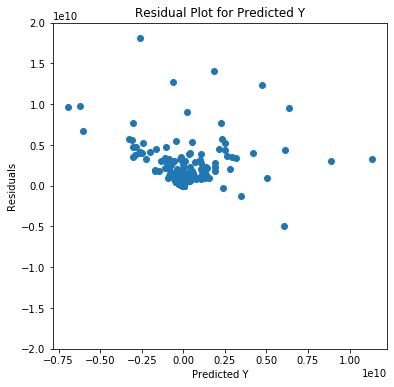

In [28]:
import matplotlib.pyplot as plt
#residual plot for predicted value
df=df.dropna()
pred_val = reg.fittedvalues.copy()
true_val = df['market_capitalization_fiscal_period_end'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,6))

ax.set(xlabel='Predicted Y', ylabel='Residuals',
       title='Residual Plot for Predicted Y')
#axes.set_xlim([xmin,xmax])
ax.set_ylim([-20000000000,20000000000])
plot= ax.scatter(residual, pred_val)

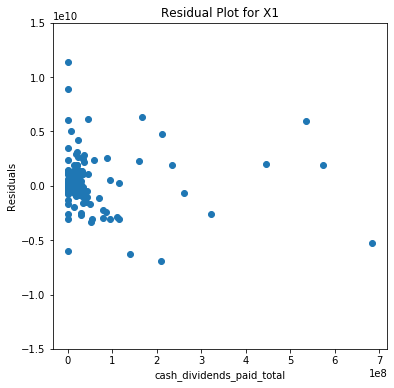

In [16]:
#residual plot for cash_dividends_paid_total
fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlabel='cash_dividends_paid_total', ylabel='Residuals',
       title='Residual Plot for X1')
#axes.set_xlim([xmin,xmax])
ax.set_ylim([-15000000000,15000000000])
plot=plt.scatter(df['cash_dividends_paid_total'],residual)

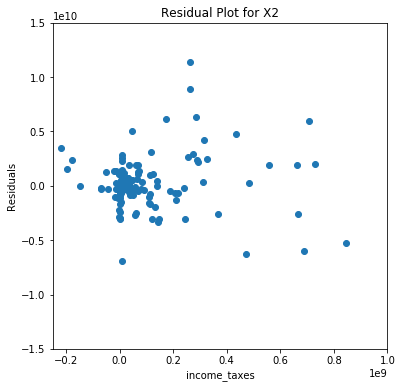

In [27]:
#residual plot for income_taxes
fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlabel='income_taxes', ylabel='Residuals',
       title='Residual Plot for X2')
ax.set_xlim([-250000000,1000000000])
ax.set_ylim([-15000000000,15000000000])
plot=plt.scatter(df['income_taxes'],residual)

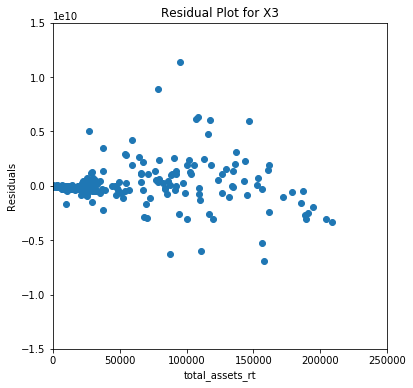

In [30]:
#residual plot for total_assets_rt
fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlabel='total_assets_rt', ylabel='Residuals',
       title='Residual Plot for X3')
ax.set_xlim([-10,250000])
ax.set_ylim([-15000000000,15000000000])
plot=plt.scatter(df['total_assets_rt'],residual)

### Q-Q Plot

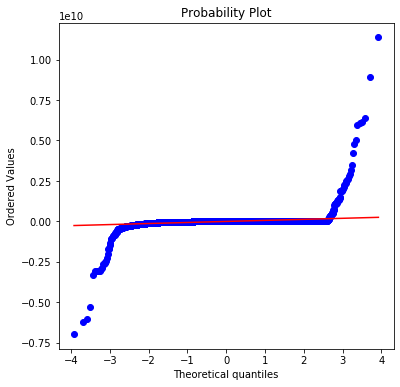

In [40]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlabel='Normal Score', ylabel='Normalized Residuals',
       title='Normal Probability Plot')
#ax.set_xlim([-10,10])
#ax.set_ylim([-20000000000,20000000000])
#plt.gca().set_aspect('equal', adjustable='box')
plot = sp.stats.probplot(residual, plot=ax, fit=True)

### Pairplot 

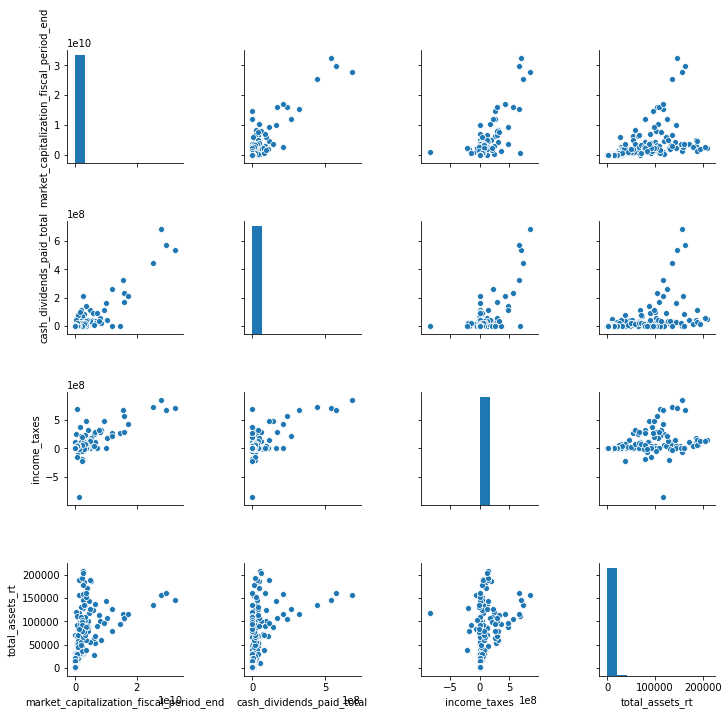

In [108]:
sns.pairplot(df)
plt.show()

### Pearson Correlation Plot

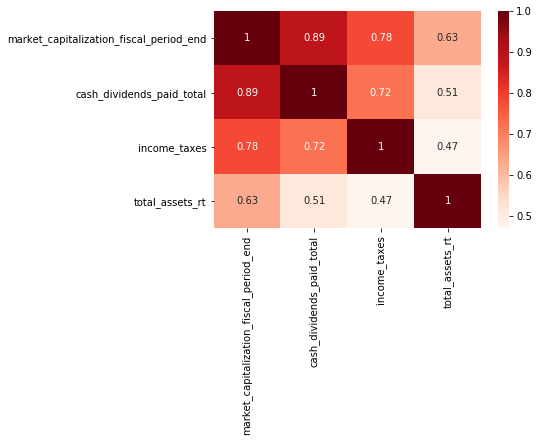

In [109]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Partial Regression Plots

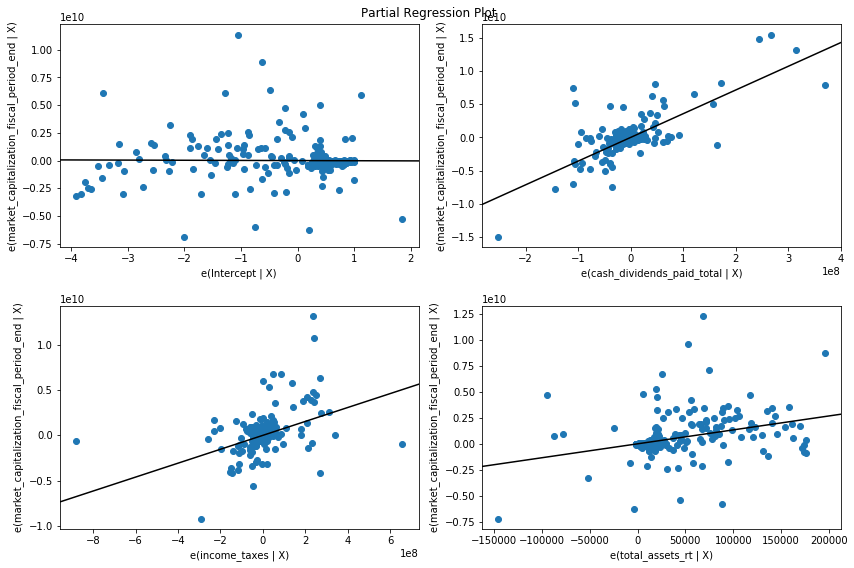

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg, fig=fig)

## Section 2.6: Panel Data Analysis 

In [3]:
#Loading the dataset
os.chdir(r'D:\MSBA Notes\DSC5106\assignments\project\version4')
hpol=pd.read_csv('reducedpol1.csv')
print(hpol.shape)
#print(hpol.head(5))
df=hpol[['Worldscope Permanent ID','Year','market_capitalization_fiscal_period_end','cash_dividends_paid_total','income_taxes','total_assets_rt']]
print(df.head(5))

(16103, 123)
  Worldscope Permanent ID  Year  market_capitalization_fiscal_period_end  \
0               C702B7140  2000                                  59708.0   
1               C702B7140  2001                                  59708.0   
2               C702B7140  2002                                  39805.0   
3               C702B7140  2003                                 121729.0   
4               C702B7140  2004                                  86232.0   

   cash_dividends_paid_total  income_taxes  total_assets_rt  
0                        0.0        1214.0       310.485104  
1                     3000.0        -351.0       266.182268  
2                        0.0          66.0       281.939710  
3                        0.0         994.0       340.188183  
4                     1997.0        3238.0       354.811217  


In [5]:
from linearmodels import PooledOLS, PanelOLS
year = pd.Categorical(df.Year)
data = df.set_index(['Worldscope Permanent ID', 'Year'])
data['year'] = year
print(data.head(5))

exog_vars = ['cash_dividends_paid_total','income_taxes','total_assets_rt', 'year']
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.market_capitalization_fiscal_period_end, exog)
pooled_res = mod.fit()
print(pooled_res)

                              market_capitalization_fiscal_period_end  \
Worldscope Permanent ID Year                                            
C702B7140               2000                                  59708.0   
                        2001                                  59708.0   
                        2002                                  39805.0   
                        2003                                 121729.0   
                        2004                                  86232.0   

                              cash_dividends_paid_total  income_taxes  \
Worldscope Permanent ID Year                                            
C702B7140               2000                        0.0        1214.0   
                        2001                     3000.0        -351.0   
                        2002                        0.0          66.0   
                        2003                        0.0         994.0   
                        2004                     1

### Random Effect

In [7]:
from linearmodels import RandomEffects
mod = RandomEffects(data.market_capitalization_fiscal_period_end, exog)
re_res = mod.fit()
print(re_res)
print(re_res.variance_decomposition)

                                   RandomEffects Estimation Summary                                  
Dep. Variable:     market_capitalization_fiscal_period_end   R-squared:                        0.7243
Estimator:                                   RandomEffects   R-squared (Between):              0.9253
No. Observations:                                    16006   R-squared (Within):               0.5012
Date:                                     Mon, Nov 18 2019   R-squared (Overall):              0.8567
Time:                                             18:40:31   Log-likelihood                -3.299e+05
Cov. Estimator:                                 Unadjusted                                           
                                                             F-statistic:                      1103.6
Entities:                                             1224   P-value                           0.0000
Avg Obs:                                            13.077   Distribution:        

### Entity effect 

In [8]:
mod1 = PanelOLS(data.market_capitalization_fiscal_period_end, exog, entity_effects=True)
fe_res1 = mod1.fit()
print(fe_res1)

                                     PanelOLS Estimation Summary                                     
Dep. Variable:     market_capitalization_fiscal_period_end   R-squared:                        0.5340
Estimator:                                        PanelOLS   R-squared (Between):              0.8275
No. Observations:                                    16006   R-squared (Within):               0.5340
Date:                                     Mon, Nov 18 2019   R-squared (Overall):              0.7897
Time:                                             18:40:52   Log-likelihood                -3.283e+05
Cov. Estimator:                                 Unadjusted                                           
                                                             F-statistic:                      444.54
Entities:                                             1224   P-value                           0.0000
Avg Obs:                                            13.077   Distribution:        

### Time Effect

In [9]:
exog_vars = ['cash_dividends_paid_total','income_taxes','total_assets_rt']
exog = sm.add_constant(data[exog_vars])
mod1 = PanelOLS(data.market_capitalization_fiscal_period_end, exog, entity_effects=True, time_effects=True)
fe_res1 = mod1.fit()
print(fe_res1)

                                     PanelOLS Estimation Summary                                     
Dep. Variable:     market_capitalization_fiscal_period_end   R-squared:                        0.5322
Estimator:                                        PanelOLS   R-squared (Between):              0.8275
No. Observations:                                    16006   R-squared (Within):               0.5324
Date:                                     Mon, Nov 18 2019   R-squared (Overall):              0.7895
Time:                                             18:41:25   Log-likelihood                -3.283e+05
Cov. Estimator:                                 Unadjusted                                           
                                                             F-statistic:                      5591.5
Entities:                                             1224   P-value                           0.0000
Avg Obs:                                            13.077   Distribution:        

# Section 3: Time Series Prediction 
## Section 3-1: C392W1280 Time Series

In [124]:
import numpy as np
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import sys
if not sys.warnoptions:
    import warnings
    #suppress warning messages (those with peach background)
    warnings.simplefilter('ignore')
    warnings.filterwarnings('ignore')

In [125]:
df=pd.read_csv('C344E1820.csv')

In [126]:
a = list(df)[0] #1st column name
e = df.iloc[0,0] #1st element
try:
    if(df[a].dtype == np.int32 or df[a].dtype == np.int64):
        df[a] = pd.to_datetime(df[a], format='%Y') 
        e = df.iloc[0,0]
        pd.to_datetime(e)
except:
    print('First column is not time-stamps!')
    raise SystemExit

In [127]:
df.index = pd.DatetimeIndex(df[a], freq='infer')
del df['Year']

In [128]:
df.dropna(how='all', inplace=True) #delete empty rows, probably at the start or end
df.dropna(axis=1, how='all', inplace=True) #delete empty columns

In [129]:
#Breaking the dataset into two parts: train and test
from datetime import datetime
train = df[df.index < datetime(year=2011, month=1, day=1, hour=0)]
test = df[df.index >= datetime(year=2011, month=1, day=1, hour=0)]

### Simple Exponential Smoothening ###

#### Make SES Model from three different alpha parameters and choose the best one ###

In [130]:
model_SES1 = SimpleExpSmoothing(train.Market_Capitalization_Fiscal_Period_End)
SES1_fit1 = model_SES1.fit()
SES1_pred1 = SES1_fit1.forecast(len(test))

SES1_fit2 = model_SES1.fit(smoothing_level=.2)
SES1_pred2 = SES1_fit2.forecast(len(test))

SES1_fit3 = model_SES1.fit(smoothing_level=.5)
SES1_pred3 = SES1_fit3.forecast(len(test))

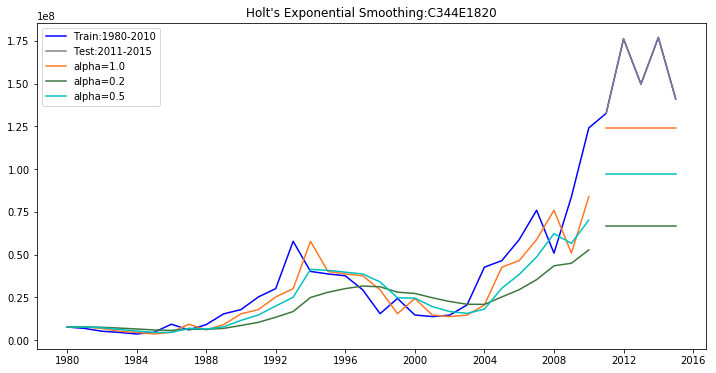

In [131]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.Market_Capitalization_Fiscal_Period_End,label='Train:1980-2010',color="blue")
ax.plot(test.Market_Capitalization_Fiscal_Period_End, label='Test:2011-2015', color="gray")
for p, f, c in zip((SES1_pred1, SES1_pred2, SES1_pred3),(SES1_fit1, SES1_fit2, SES1_fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Holt's Exponential Smoothing:C344E1820")
plt.legend();

### Holt's Exponential Smoothing ###

#### Make Holt's Exponential Smoothing Model from three different Level and Trend parameters and choose the best one ###

In [132]:
# make Holt's models for C344E1820
model_H1 = Holt(train.Market_Capitalization_Fiscal_Period_End)

Holt1_fit = model_H1.fit(smoothing_level=0.3, smoothing_slope=.05)
Holt1_pred = Holt1_fit.forecast(len(test))

Holt2_fit = model_H1.fit(optimized=True)
Holt2_pred = Holt2_fit.forecast(len(test))

Holt3_fit = model_H1.fit(smoothing_level=.3, smoothing_slope=.2)
Holt3_pred = Holt3_fit.forecast(len(test))

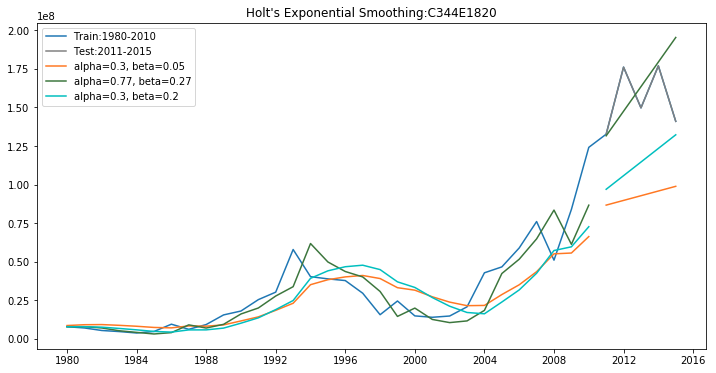

In [133]:
# Show each model
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.Market_Capitalization_Fiscal_Period_End, label='Train:1980-2010')
ax.plot(test.Market_Capitalization_Fiscal_Period_End, label='Test:2011-2015', color="gray")
for p, f, c in zip((Holt1_pred, Holt2_pred, Holt3_pred),(Holt1_fit, Holt2_fit, Holt3_fit),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing:C344E1820")
plt.legend();

In [134]:
SES1 = SimpleExpSmoothing(train.Market_Capitalization_Fiscal_Period_End)
SES1_fit = SES1.fit()
SES1_pred = SES1_fit.forecast(len(test))

In [135]:
model_H1 = Holt(train.Market_Capitalization_Fiscal_Period_End)
Holt1_fit = model_H1.fit(optimized=True)
Holt1_pred = Holt1_fit.forecast(len(test))

### Holt Winters ###

In [136]:
winters = ExponentialSmoothing(train.Market_Capitalization_Fiscal_Period_End, seasonal_periods=5, trend='add', seasonal='mul').fit()
winters_pred=winters.forecast(len(test))

### ARIMA ###

The frequency of the data is : 10

Time Series Decomposition for 31 observations:


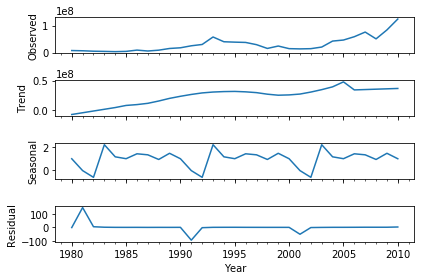

Last 10 observations:


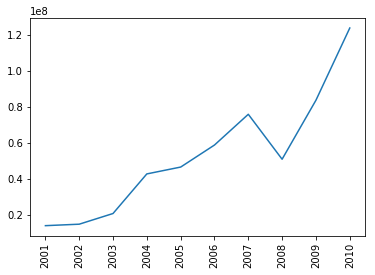

Last 10 fitted (non-forecast) trend values:


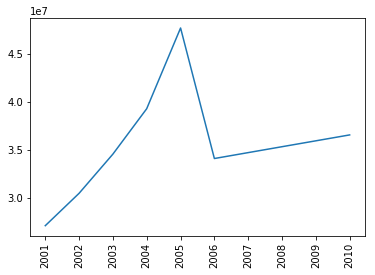

Last 10 fitted (non-forecast) seasonal indices:


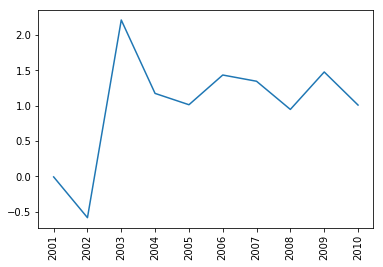

In [137]:
#decomposition:
period1=10
print('The frequency of the data is :',period1)
if 'mf4' in vars() or 'mf4' in globals() or 'mf4' in vars(__builtins__):
    del mf4 #delete d if defined during previous run
mf4 = seasonal_decompose(train.Market_Capitalization_Fiscal_Period_End, model='mul', freq=period1, extrapolate_trend='freq') #'extrapolate' removes NaN in 'trend'
print('\nTime Series Decomposition for', train.shape[0], 'observations:')
#pl.xticks(rotation=90) #doesn't work
mf4.plot()
plt.show()
t = 366 #tail
if len(mf4.observed) > t:
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    plt.show()
    
t = 53 #tail
if len(mf4.observed) > t:
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    plt.show()
    
if len(mf4.observed) > period1:
    print('Last', period1, 'observations:')
    plt.xticks(rotation=90)
    plt.plot(mf4.observed[-period1:])
    plt.show()
    #print('Last',period1,"trend values (may not have same time periods as 'observations' above and 'seasonal indices' below):")
    print('Last', period1, 'fitted (non-forecast) trend values:')
    plt.xticks(rotation=90)
    plt.plot(mf4.trend[-period1:])
    plt.show()
    print('Last', period1, 'fitted (non-forecast) seasonal indices:')
    plt.xticks(rotation=90)
    plt.plot(mf4.seasonal[-period1:])
    plt.show()

In [138]:
#Dickey Fuller Test
adfinput = adfuller(train['Market_Capitalization_Fiscal_Period_End'])
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test     0.9253
P-value                            0.9934
Used Lags                          0.0000
Number of comments used           30.0000
Critical Value (1%)               -3.6699
Critical Value (5%)               -2.9641
Critical Value (10%)              -2.6212
dtype: float64

#### p-Value is insignificant, so we decide to go difference the series to make it stationary ####

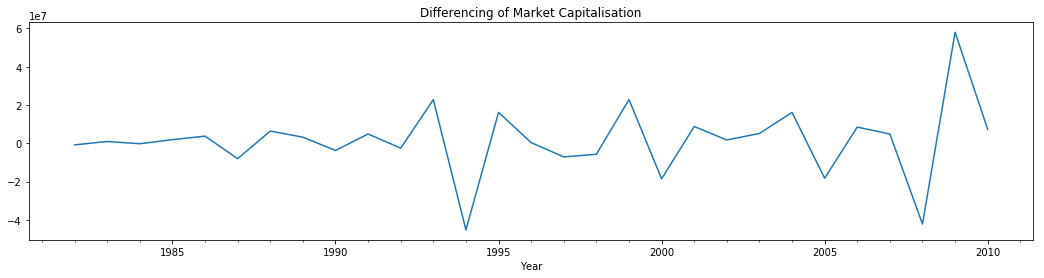

Year
1982-01-01    -818161.0
1983-01-01     942594.0
1984-01-01    -226944.0
1985-01-01    1900174.0
1986-01-01    3740057.0
Freq: AS-JAN, Name: Market_Capitalization_Fiscal_Period_End, dtype: float64

In [139]:
train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna().plot(figsize=(18,4))
plt.title('Differencing of Market Capitalisation')
plt.show()
train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna().head()

In [140]:
#Dickey Fuller Test on data after differencing twice
adfinput = adfuller(train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna())
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test    -6.5804
P-value                            0.0000
Used Lags                          1.0000
Number of comments used           27.0000
Critical Value (1%)               -3.6996
Critical Value (5%)               -2.9764
Critical Value (10%)              -2.6276
dtype: float64

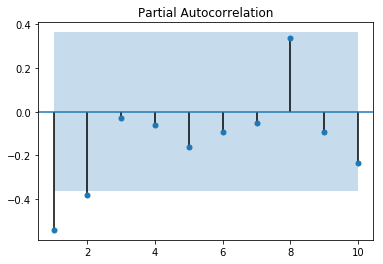

<Figure size 1008x432 with 0 Axes>

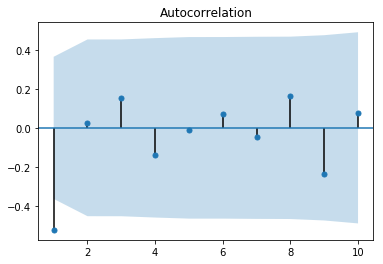

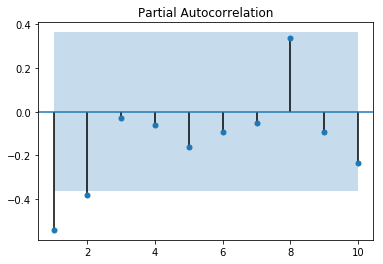

In [141]:
plt.figure(figsize=(14,6))
plot_acf(train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna(), lags=10, zero=False)
plot_pacf(train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna(), lags=10, zero=False)

In [142]:
#train1 = df[df.index <= datetime(year=2011, month=1, day=1, hour=0)]
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.Market_Capitalization_Fiscal_Period_End, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                         ARIMA Model Results                                          
Dep. Variable:     D2.Market_Capitalization_Fiscal_Period_End   No. Observations:                   29
Model:                                         ARIMA(1, 2, 1)   Log Likelihood                -518.938
Method:                                               css-mle   S.D. of innovations       14081235.508
Date:                                        Mon, 18 Nov 2019   AIC                           1045.877
Time:                                                17:38:33   BIC                           1051.346
Sample:                                            01-01-1982   HQIC                          1047.590
                                                 - 01-01-2010                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

In [143]:
from datetime import datetime
prd = model_fit.predict(start=datetime(2011,1,1), end=datetime(2015,1,1))
prd.iloc[:]=model_fit.forecast(len(test))[0]

#### Market Cap Robustness Tests ###

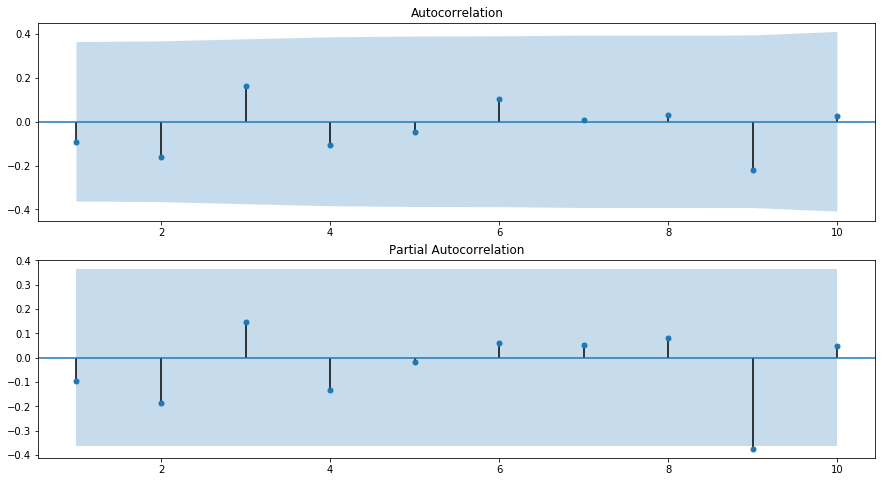

In [144]:
import statsmodels.api as sm
res = model_fit.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=10, ax=ax[0],zero=False)
fig = sm.graphics.tsa.plot_pacf(res, lags=10, ax=ax[1],zero=False)
plt.show()

#### The above correlogram shows that there's no correlation between the residuals, and therefore this model is acceptable ####

In [145]:
sr=test['Market_Capitalization_Fiscal_Period_End']

In [146]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(sr, prd[0:5]))

In [147]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [148]:
arima_mape=mean_absolute_percentage_error(sr,prd[0:5])

In [149]:
arima_mape=mean_absolute_percentage_error(sr,prd[0:5])
ses_mape=mean_absolute_percentage_error(sr,SES1_pred)
holt_mape=mean_absolute_percentage_error(sr,Holt1_pred)
winters_mape=mean_absolute_percentage_error(sr,winters_pred)
print("ARIMA_MAPE:",arima_mape,"ses_mape:",ses_mape,"holt_mape:",holt_mape,"winters_mape",winters_mape)

ARIMA_MAPE: 29.146082092434984 ses_mape: 18.987531353313205 holt_mape: 13.242944637749215 winters_mape 16.128660221834117


#### Holt's gives the best prediction ####

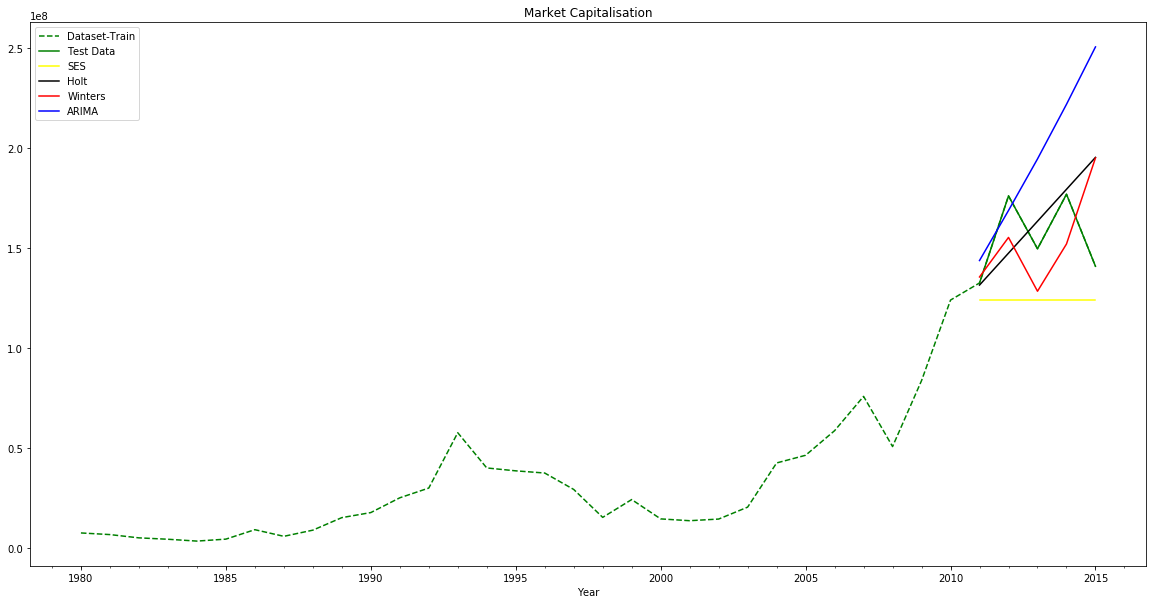

Forecasting Market Capitalisation using SES,Holt,Holt-Winters and ARIMA method


In [150]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Market Capitalisation')
df.Market_Capitalization_Fiscal_Period_End.plot(style='--', color='green',legend=True)
test.Market_Capitalization_Fiscal_Period_End.plot(color='green',legend=True)
SES1_pred.plot(color='yellow',legend=True)
Holt1_pred.plot(color='black',legend=True)
winters_pred.plot(color='red', legend=True)
prd.plot(color='blue',legend=True)
plt.legend(['Dataset-Train','Test Data','SES','Holt','Winters','ARIMA'])
#fit1.forecast(5).plot(color='blue', legend=True)
plt.show()
print("Forecasting Market Capitalisation using SES,Holt,Holt-Winters and ARIMA method")

## Section 3-2: C392W1280 Time Series

In [151]:
df=pd.read_csv('C392W1280.csv')

In [152]:
a = list(df)[0] #1st column name
e = df.iloc[0,0] #1st element
try:
    if(df[a].dtype == np.int32 or df[a].dtype == np.int64):
        df[a] = pd.to_datetime(df[a], format='%Y') 
        e = df.iloc[0,0]
        pd.to_datetime(e)
except:
    print('First column is not time-stamps!')
    raise SystemExit

In [153]:
df.index = pd.DatetimeIndex(df[a], freq='infer')
del df['Year']

In [154]:
df.dropna(how='all', inplace=True) #delete empty rows, probably at the start or end
df.dropna(axis=1, how='all', inplace=True) #delete empty columns

In [155]:
#Breaking the dataset into two parts: train and test
from datetime import datetime
train = df[df.index < datetime(year=2011, month=1, day=1, hour=0)]
test = df[df.index >= datetime(year=2011, month=1, day=1, hour=0)]

### Simple Exponential Smoothening ###

#### Make SES Model from three different alpha parameters and choose the best one ###

In [156]:
model_SES1 = SimpleExpSmoothing(train.Market_Capitalization_Fiscal_Period_End.astype('double'))
SES1_fit1 = model_SES1.fit()
SES1_pred1 = SES1_fit1.forecast(len(test))

SES1_fit2 = model_SES1.fit(smoothing_level=.2)
SES1_pred2 = SES1_fit2.forecast(len(test))

SES1_fit3 = model_SES1.fit(smoothing_level=.5)
SES1_pred3 = SES1_fit3.forecast(len(test))

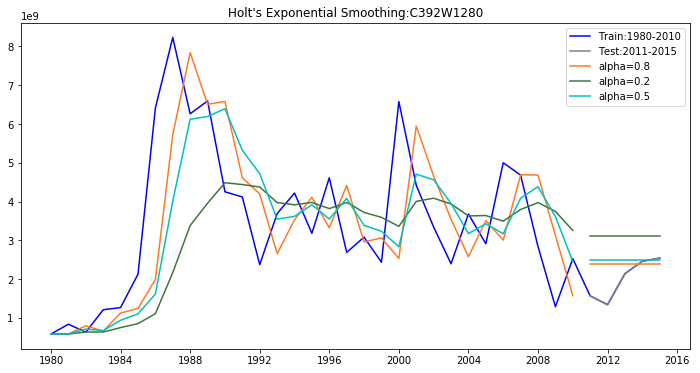

In [157]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.Market_Capitalization_Fiscal_Period_End,label='Train:1980-2010',color="blue")
ax.plot(test.Market_Capitalization_Fiscal_Period_End, label='Test:2011-2015', color="gray")
for p, f, c in zip((SES1_pred1, SES1_pred2, SES1_pred3),(SES1_fit1, SES1_fit2, SES1_fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Holt's Exponential Smoothing:C392W1280")
plt.legend();

### Holt's Exponential Smoothing ###

#### Make Holt's Exponential Smoothing Model from three different Level and Trend parameters and choose the best one ###

In [158]:
# make Holt's models for C392W1280
model_H1 = Holt(train.Market_Capitalization_Fiscal_Period_End.astype('double'))

Holt1_fit = model_H1.fit(smoothing_level=0.3, smoothing_slope=.05)
Holt1_pred = Holt1_fit.forecast(len(test))

Holt2_fit = model_H1.fit(optimized=True)
Holt2_pred = Holt2_fit.forecast(len(test))

Holt3_fit = model_H1.fit(smoothing_level=.3, smoothing_slope=.2)
Holt3_pred = Holt3_fit.forecast(len(test))

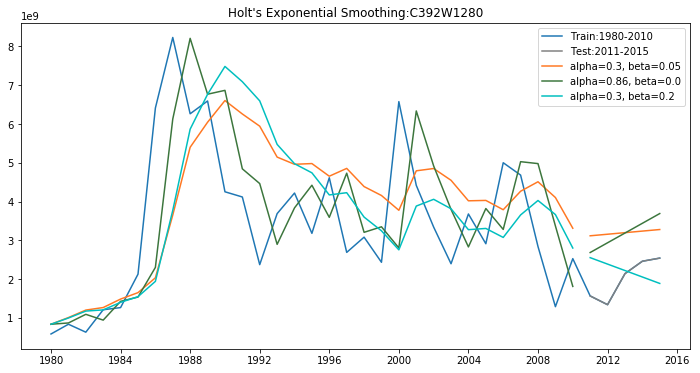

In [159]:
# Show each model
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.Market_Capitalization_Fiscal_Period_End, label='Train:1980-2010')
ax.plot(test.Market_Capitalization_Fiscal_Period_End, label='Test:2011-2015', color="gray")
for p, f, c in zip((Holt1_pred, Holt2_pred, Holt3_pred),(Holt1_fit, Holt2_fit, Holt3_fit),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing:C392W1280")
plt.legend();

### Holt Winters ###

In [160]:
winters = ExponentialSmoothing(train.Market_Capitalization_Fiscal_Period_End.astype('double'), seasonal_periods=3, trend='add', seasonal='mul').fit()
winters_pred=winters.forecast(len(test))

### ARIMA ###


Time Series Decomposition for 31 observations:


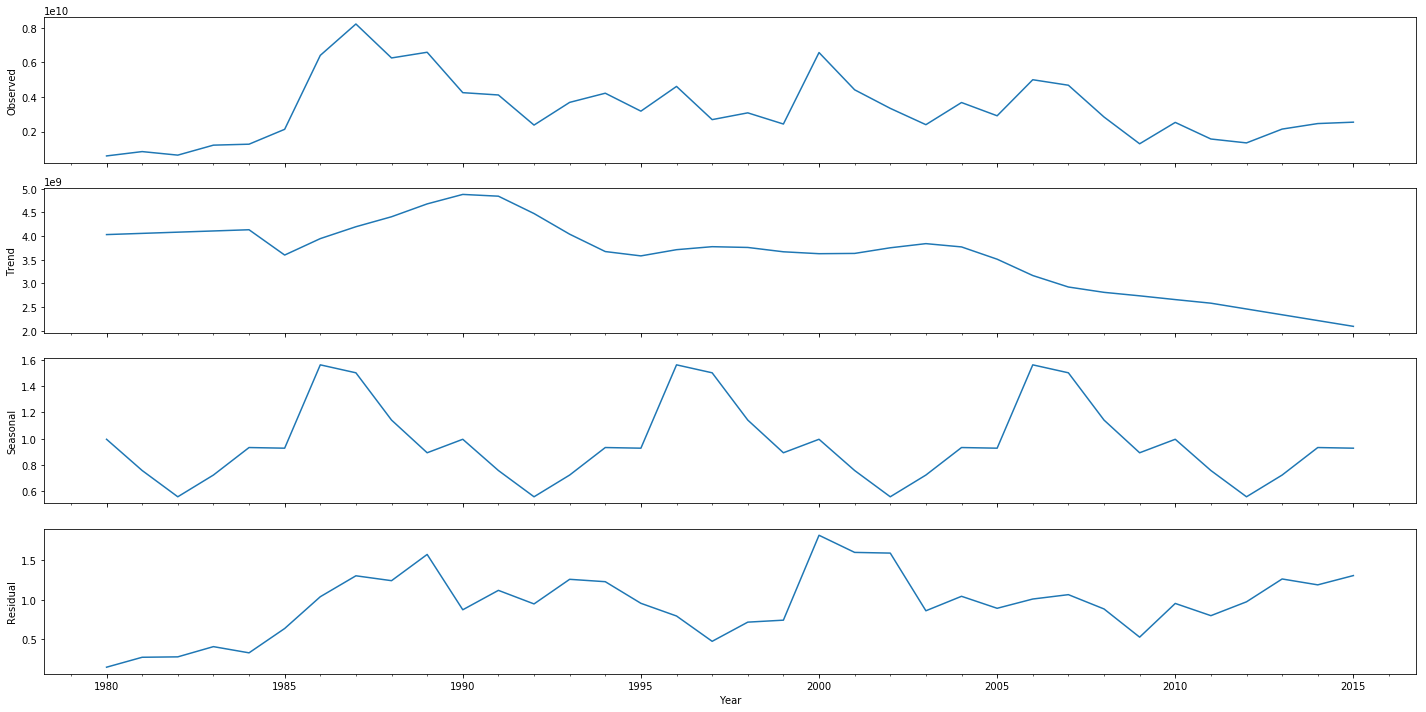

Last 31 observations (in red) & Multiplicative Decomposition fitted values:


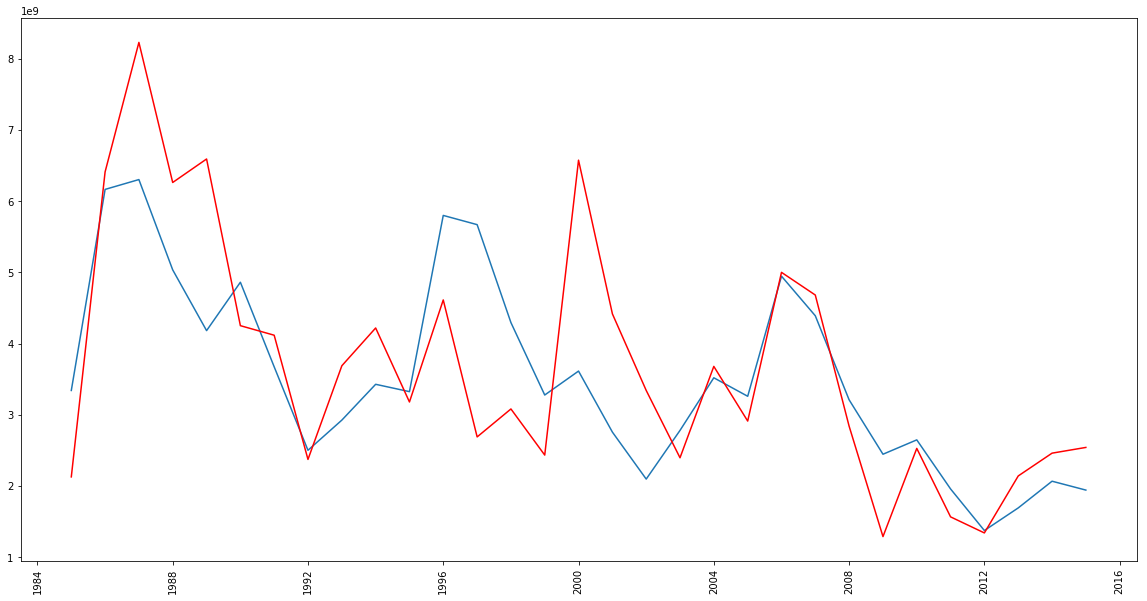

Last 10 observations (in red) & Multiplicative Decomposition fitted values:


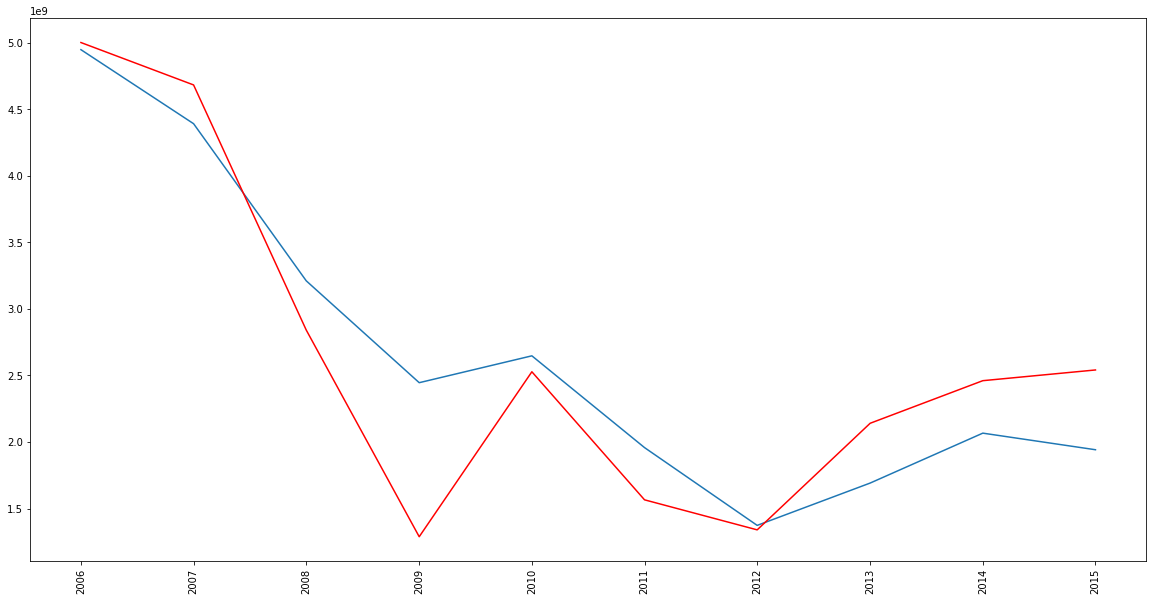

Last 10 fitted (non-forecast) trend values:


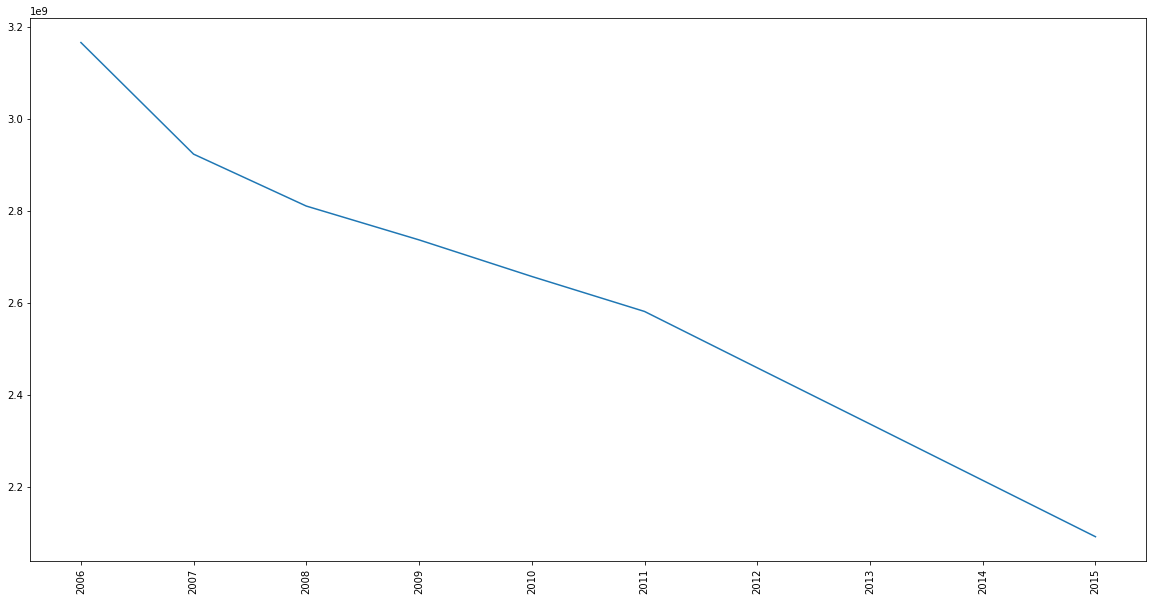

Last 10 fitted (non-forecast) seasonal indices:


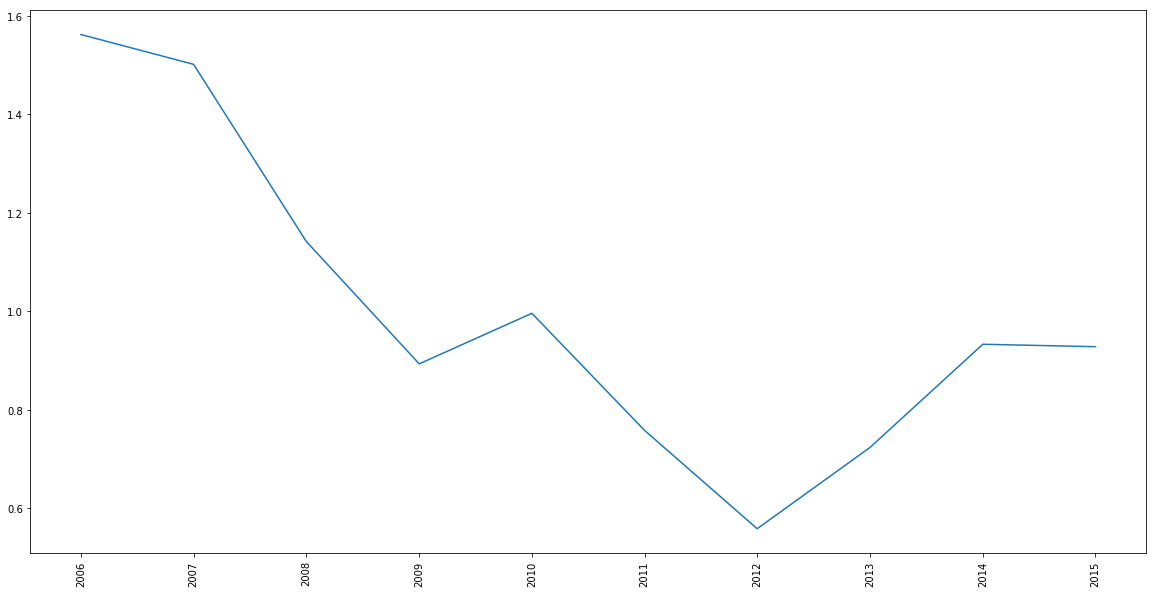

In [161]:
mf4 = seasonal_decompose(df.Market_Capitalization_Fiscal_Period_End, model='mul', freq=period1, extrapolate_trend='freq') #'extrapolate' removes NaN in 'trend'
npr=31
print('\nTime Series Decomposition for 31 observations:')
#pl.xticks(rotation=90) #doesn't work
mf4.plot()
plt.show()
mf4obs = mf4.observed.copy()
mf4trend = mf4.trend.copy()
mf4season = mf4.seasonal.copy()

t = 366 #tail
if len(mf4.observed) > t:
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    plt.show()
    
t = 53 #tail
if len(mf4.observed) > t:
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    plt.show()

print('Last', npr, 'observations (in red) & Multiplicative Decomposition fitted values:')
plt.xticks(rotation=90)
plt.plot(mf4trend[-npr:] * mf4season[-npr:])
plt.plot(mf4obs[-npr:], color='red')
plt.show()

if len(mf4.observed) > period1:
    print('Last', period1, 'observations (in red) & Multiplicative Decomposition fitted values:')
    plt.xticks(rotation=90)
    plt.plot(mf4.trend[-period1:] * mf4.seasonal[-period1:])
    plt.plot(mf4.observed[-period1:], color='red')
    plt.show()
    #print('Last',period1,"trend values (may not have same time periods as 'observations' above and 'seasonal indices' below):")
    print('Last', period1, 'fitted (non-forecast) trend values:')
    plt.xticks(rotation=90)
    plt.plot(mf4.trend[-period1:])
    plt.show()
    print('Last', period1, 'fitted (non-forecast) seasonal indices:')
    plt.xticks(rotation=90)
    plt.plot(mf4.seasonal[-period1:])
    plt.show()

In [162]:
#Dickey Fuller Test
adfinput = adfuller(train['Market_Capitalization_Fiscal_Period_End'])
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test    -2.7334
P-value                            0.0684
Used Lags                          7.0000
Number of comments used           23.0000
Critical Value (1%)               -3.7529
Critical Value (5%)               -2.9985
Critical Value (10%)              -2.6390
dtype: float64

#### p-Value is insignificant, so we decide to go difference the series to make it stationary

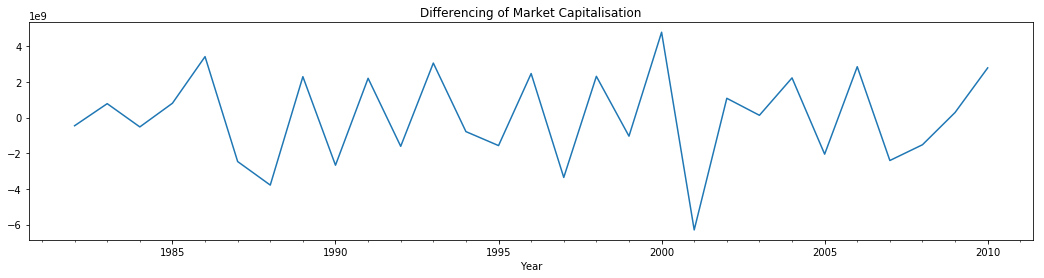

Year
1982-01-01   -4.559255e+08
1983-01-01    7.829034e+08
1984-01-01   -5.223276e+08
1985-01-01    8.060536e+08
1986-01-01    3.421632e+09
Freq: AS-JAN, Name: Market_Capitalization_Fiscal_Period_End, dtype: float64

In [163]:
train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna().plot(figsize=(18,4))
plt.title('Differencing of Market Capitalisation')
plt.show()
train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna().head()

In [164]:
#Dickey Fuller Test on data after differencing twice
adfinput = adfuller(train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna())
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test    -5.2789
P-value                            0.0000
Used Lags                          5.0000
Number of comments used           23.0000
Critical Value (1%)               -3.7529
Critical Value (5%)               -2.9985
Critical Value (10%)              -2.6390
dtype: float64

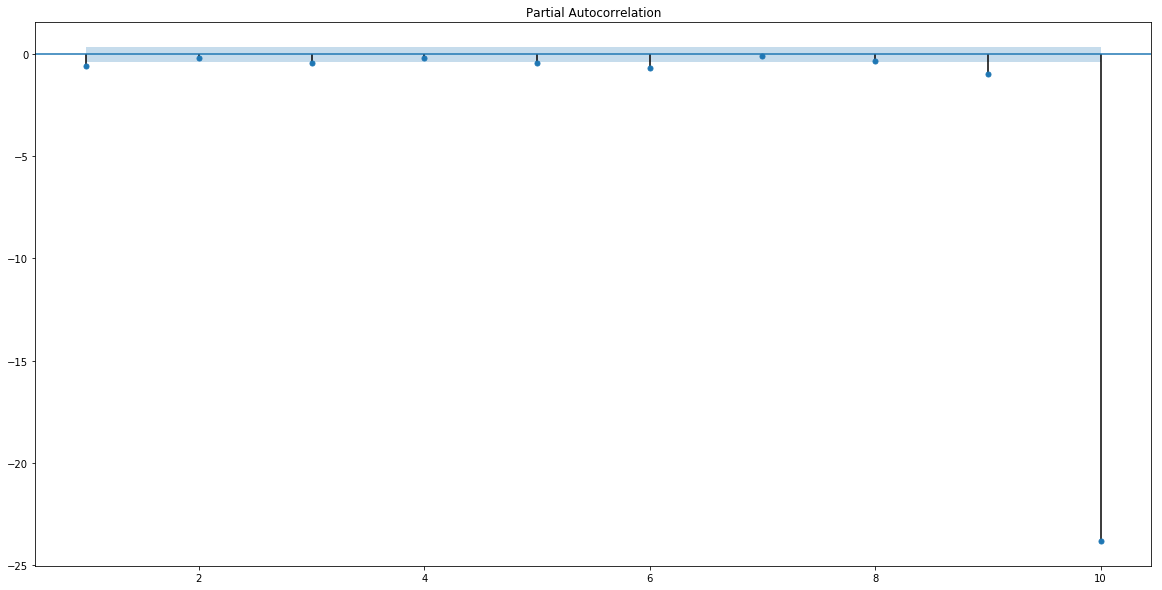

<Figure size 1008x432 with 0 Axes>

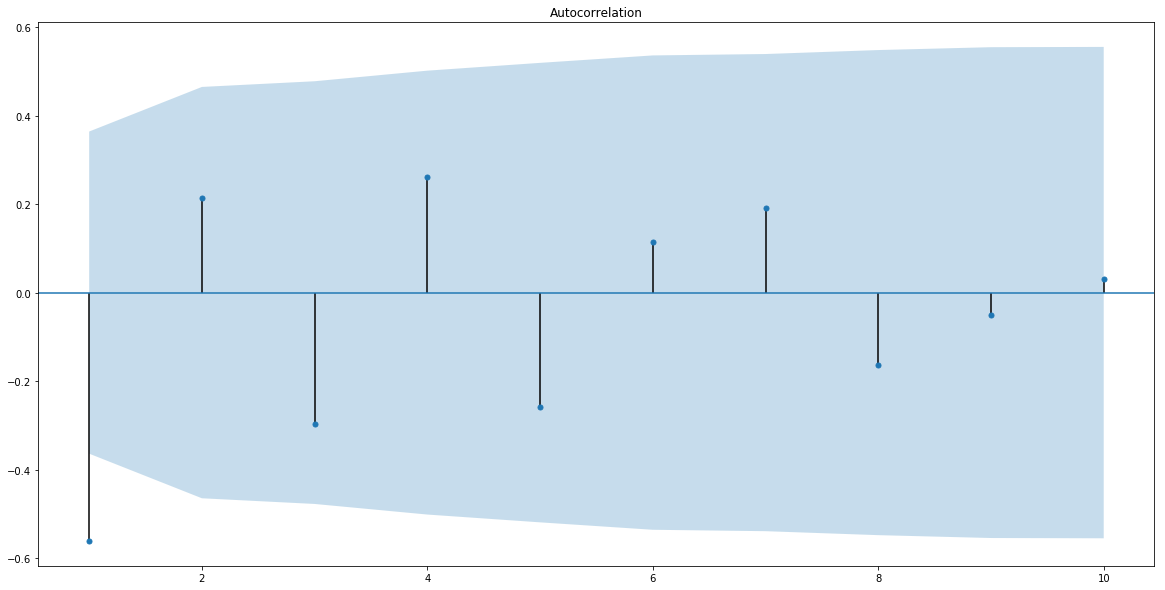

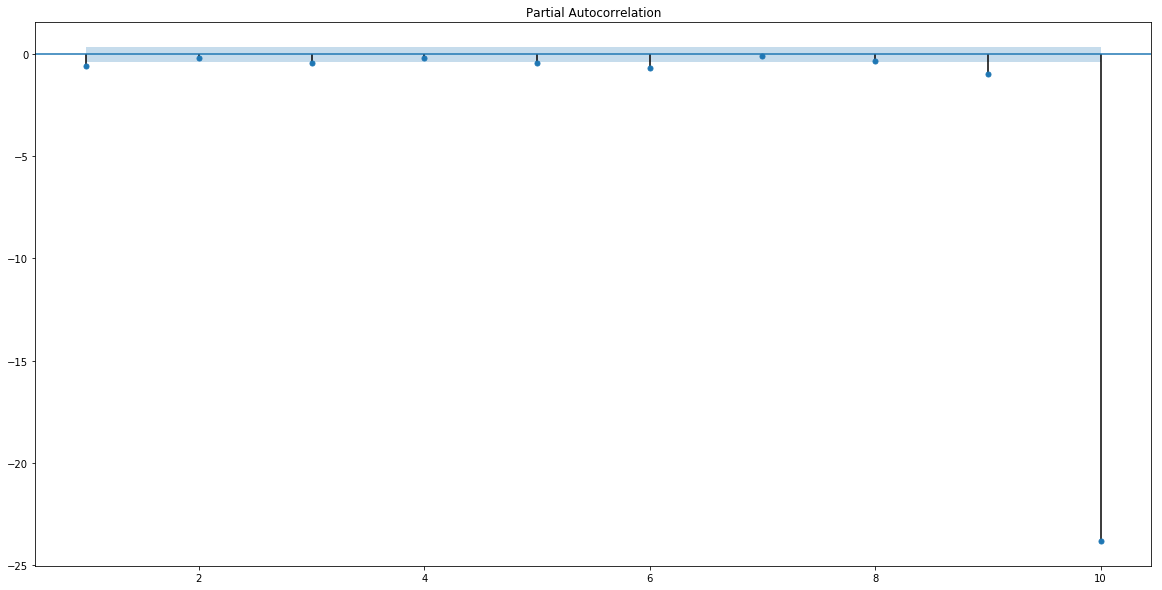

In [165]:
plt.figure(figsize=(14,6))
plot_acf(train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna(), lags=10, zero=False)
plot_pacf(train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna(), lags=10, zero=False)

In [166]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.Market_Capitalization_Fiscal_Period_End, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                         ARIMA Model Results                                         
Dep. Variable:     D.Market_Capitalization_Fiscal_Period_End   No. Observations:                   30
Model:                                        ARIMA(1, 1, 0)   Log Likelihood                -679.147
Method:                                              css-mle   S.D. of innovations     1641634021.816
Date:                                       Mon, 18 Nov 2019   AIC                           1364.294
Time:                                               17:38:43   BIC                           1368.497
Sample:                                           01-01-1981   HQIC                          1365.638
                                                - 01-01-2010                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [167]:
prd = model_fit.predict(start=datetime(2011,1,1), end=datetime(2015,1,1))
prd.iloc[:]=model_fit.forecast(5)[0]

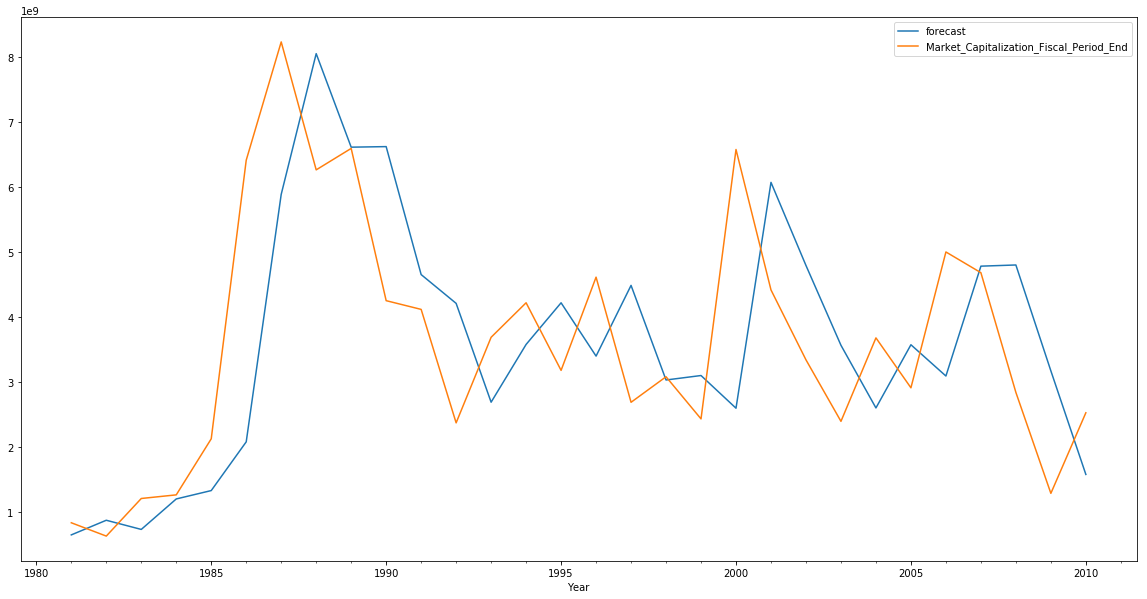

In [168]:
model_fit.plot_predict(dynamic=False)
plt.show()

#### Market Cap Robustness Tests ###

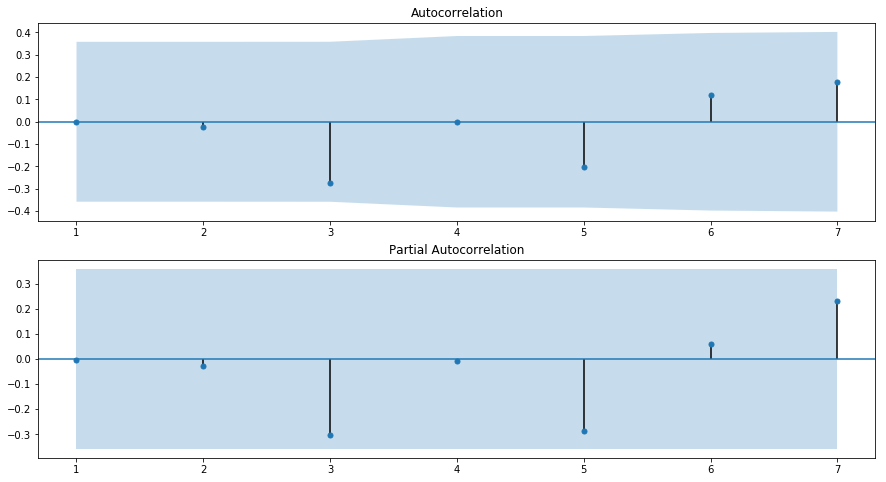

In [169]:
import statsmodels.api as sm
res = model_fit.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=7, ax=ax[0],zero=False)
fig = sm.graphics.tsa.plot_pacf(res, lags=7, ax=ax[1],zero=False)
plt.show()

#### The above correlogram shows that there's no correlation between the residuals, and therefore this model is acceptable ####

In [50]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [51]:
sr=test['Market_Capitalization_Fiscal_Period_End']

In [52]:
arima_mape=mean_absolute_percentage_error(sr,prd[0:5])
ses_mape=mean_absolute_percentage_error(sr,SES1_pred1)
holt_mape=mean_absolute_percentage_error(sr,Holt2_pred)
winters_mape=mean_absolute_percentage_error(sr,winters_pred)
print("ARIMA_MAPE:",arima_mape,"ses_mape:",ses_mape,"holt_mape:",holt_mape,"winters_mape",winters_mape)

ARIMA_MAPE: 35.40334089651368 ses_mape: 30.04285403707797 holt_mape: 64.86096640547443 winters_mape 31.967638638542827


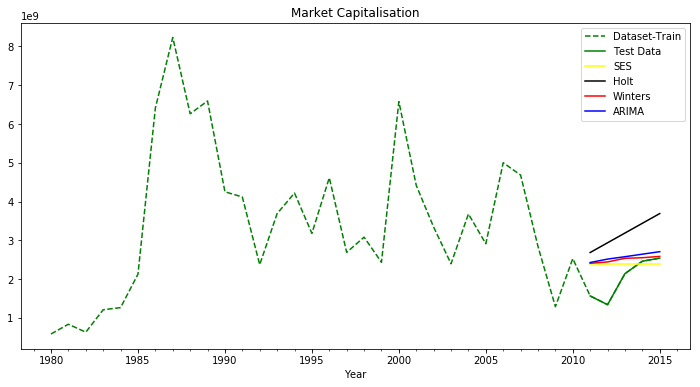

Forecasting Market Capitalisation using SES,Holt,Holt-Winters and ARIMA method


In [53]:
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Market Capitalisation')
df.Market_Capitalization_Fiscal_Period_End.plot(style='--', color='green',legend=True)
test.Market_Capitalization_Fiscal_Period_End.plot(color='green',legend=True)
SES1_pred1.plot(color='yellow',legend=True)
Holt2_pred.plot(color='black',legend=True)
winters_pred.plot(color='red', legend=True)
prd.plot(color='blue',legend=True)
plt.legend(['Dataset-Train','Test Data','SES','Holt','Winters','ARIMA'])
#fit1.forecast(5).plot(color='blue', legend=True)
plt.show()
print("Forecasting Market Capitalisation using SES,Holt,Holt-Winters and ARIMA method")

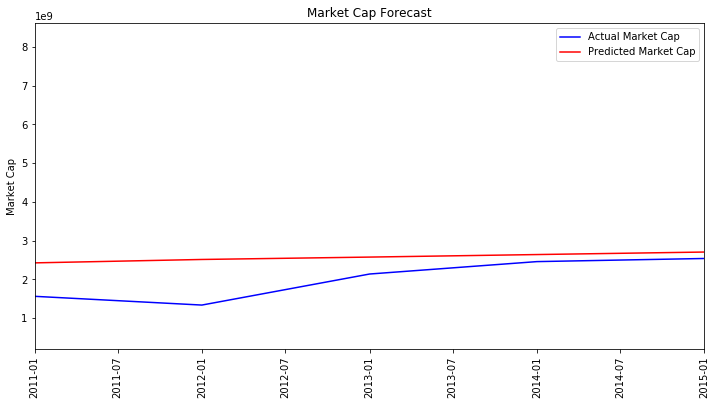

In [54]:
sr=pd.Series(df['Market_Capitalization_Fiscal_Period_End'])
plt.figure(figsize=(12,6))
prd = model_fit.predict(start=datetime(2011,1,1), end=datetime(2015,1,1))
prd.iloc[:]=model_fit.forecast(5)[0]
ax = plt.axes()
ax.plot(sr.index.values,sr, color='blue', label = "Actual Market Cap")        # specify color by name
ax.plot(prd.index.values, prd[0:], color='red', label = "Predicted Market Cap") 
ax.legend()
plt.xticks(rotation='vertical')

ax.set(xlim= [datetime(2011, 1, 1), datetime(2015, 1, 1)],
       ylabel='Market Cap',
       title='Market Cap Forecast')
plt.show()

## Section 3-3: C392X3240 Time Series

In [55]:
df=pd.read_csv('C392X3240.csv')

In [56]:
a = list(df)[0] #1st column name
e = df.iloc[0,0] #1st element
try:
    if(df[a].dtype == np.int32 or df[a].dtype == np.int64):
        df[a] = pd.to_datetime(df[a], format='%Y') 
        e = df.iloc[0,0]
        pd.to_datetime(e)
except:
    print('First column is not time-stamps!')
    raise SystemExit

In [57]:
df.index = pd.DatetimeIndex(df[a], freq='infer')
del df['Year']

In [58]:
df.dropna(how='all', inplace=True) #delete empty rows, probably at the start or end
df.dropna(axis=1, how='all', inplace=True) #delete empty columns

In [59]:
#Breaking the dataset into two parts: train and test
from datetime import datetime
train = df[df.index < datetime(year=2011, month=1, day=1, hour=0)]
test = df[df.index >= datetime(year=2011, month=1, day=1, hour=0)]

### Simple Exponential Smoothening ###

#### Make SES Model from three different alpha parameters and choose the best one ###

In [60]:
model_SES1 = SimpleExpSmoothing(train.Market_Capitalization_Fiscal_Period_End.astype('double'))
SES1_fit1 = model_SES1.fit()
SES1_pred1 = SES1_fit1.forecast(len(test))

SES1_fit2 = model_SES1.fit(smoothing_level=.2)
SES1_pred2 = SES1_fit2.forecast(len(test))

SES1_fit3 = model_SES1.fit(smoothing_level=.5)
SES1_pred3 = SES1_fit3.forecast(len(test))

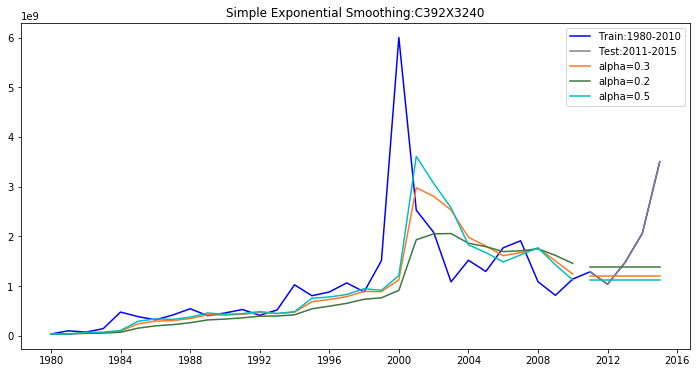

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.Market_Capitalization_Fiscal_Period_End,label='Train:1980-2010',color="blue")
ax.plot(test.Market_Capitalization_Fiscal_Period_End, label='Test:2011-2015', color="gray")
for p, f, c in zip((SES1_pred1, SES1_pred2, SES1_pred3),(SES1_fit1, SES1_fit2, SES1_fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing:C392X3240")
plt.legend();

### Holt's Exponential Smoothing ###

#### Make Holt's Exponential Smoothing Model from three different Level and Trend parameters and choose the best one ###

In [62]:
# make Holt's models for C392X3240
model_H1 = Holt(train.Market_Capitalization_Fiscal_Period_End.astype('double'))

Holt1_fit = model_H1.fit(smoothing_level=0.3, smoothing_slope=.05)
Holt1_pred = Holt1_fit.forecast(len(test))

Holt2_fit = model_H1.fit(optimized=True)
Holt2_pred = Holt2_fit.forecast(len(test))

Holt3_fit = model_H1.fit(smoothing_level=.3, smoothing_slope=.2)
Holt3_pred = Holt3_fit.forecast(len(test))

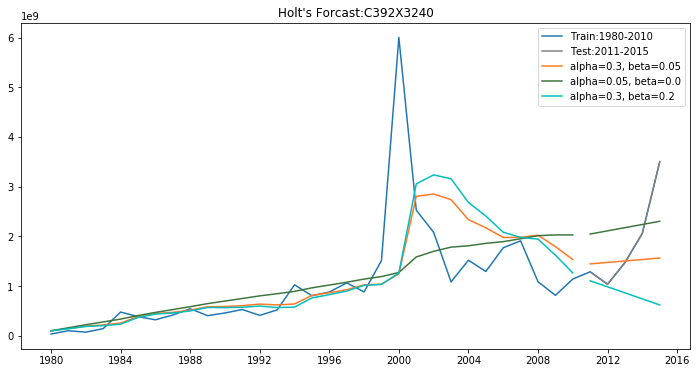

In [63]:
# Show each model
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.Market_Capitalization_Fiscal_Period_End, label='Train:1980-2010')
ax.plot(test.Market_Capitalization_Fiscal_Period_End, label='Test:2011-2015', color="gray")
for p, f, c in zip((Holt1_pred, Holt2_pred, Holt3_pred),(Holt1_fit, Holt2_fit, Holt3_fit),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Forcast:C392X3240")
plt.legend();

### Winters ###

In [64]:
winters = ExponentialSmoothing(train.Market_Capitalization_Fiscal_Period_End.astype('double'), seasonal_periods=5, trend='add', seasonal='mul').fit()
winters_pred=winters.forecast(len(test))

### ARIMA ###

The frequency of the data is : 10

Time Series Decomposition for 31 observations:


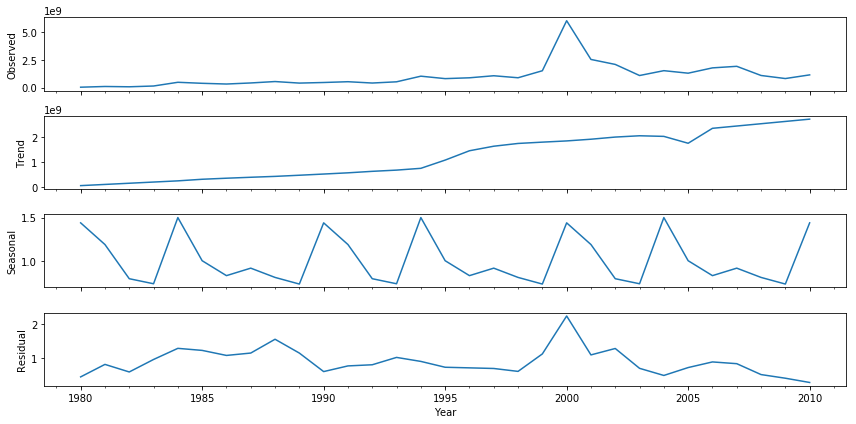

Last 10 observations:


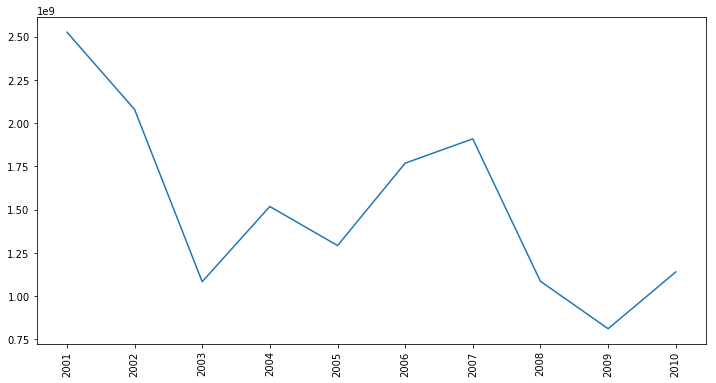

Last 10 fitted (non-forecast) trend values:


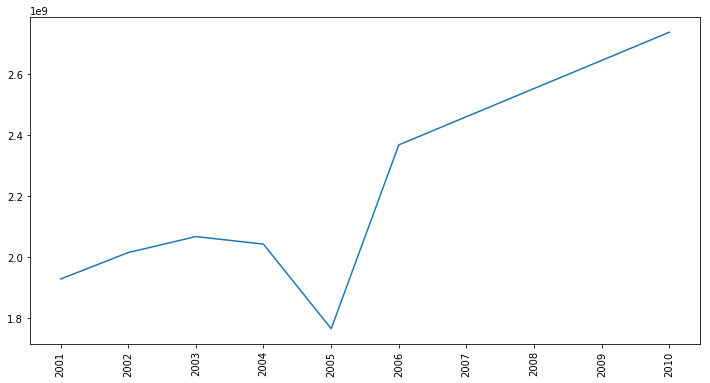

Last 10 fitted (non-forecast) seasonal indices:


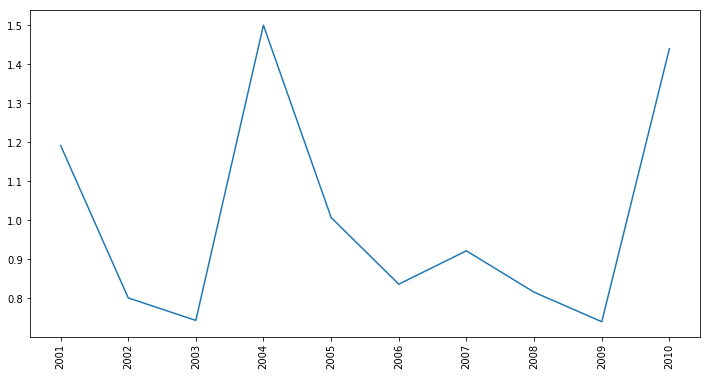

In [65]:
#decomposition:
period1=10
print('The frequency of the data is :',period1)
if 'mf4' in vars() or 'mf4' in globals() or 'mf4' in vars(__builtins__):
    del mf4 #delete d if defined during previous run
mf4 = seasonal_decompose(train.Market_Capitalization_Fiscal_Period_End, model='mul', freq=period1, extrapolate_trend='freq') #'extrapolate' removes NaN in 'trend'
print('\nTime Series Decomposition for', train.shape[0], 'observations:')
#pl.xticks(rotation=90) #doesn't work
mf4.plot()
plt.show()
t = 366 #tail
if len(mf4.observed) > t:
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    plt.show()
    
t = 53 #tail
if len(mf4.observed) > t:
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    plt.show()
    
if len(mf4.observed) > period1:
    print('Last', period1, 'observations:')
    plt.xticks(rotation=90)
    plt.plot(mf4.observed[-period1:])
    plt.show()
    #print('Last',period1,"trend values (may not have same time periods as 'observations' above and 'seasonal indices' below):")
    print('Last', period1, 'fitted (non-forecast) trend values:')
    plt.xticks(rotation=90)
    plt.plot(mf4.trend[-period1:])
    plt.show()
    print('Last', period1, 'fitted (non-forecast) seasonal indices:')
    plt.xticks(rotation=90)
    plt.plot(mf4.seasonal[-period1:])
    plt.show()

In [66]:
#Dickey Fuller Test
adfinput = adfuller(train['Market_Capitalization_Fiscal_Period_End'])
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test    -3.0944
P-value                            0.0270
Used Lags                          0.0000
Number of comments used           30.0000
Critical Value (1%)               -3.6699
Critical Value (5%)               -2.9641
Critical Value (10%)              -2.6212
dtype: float64

#### p-Value is insignificant, so we decide to difference the series to make it stationary ####

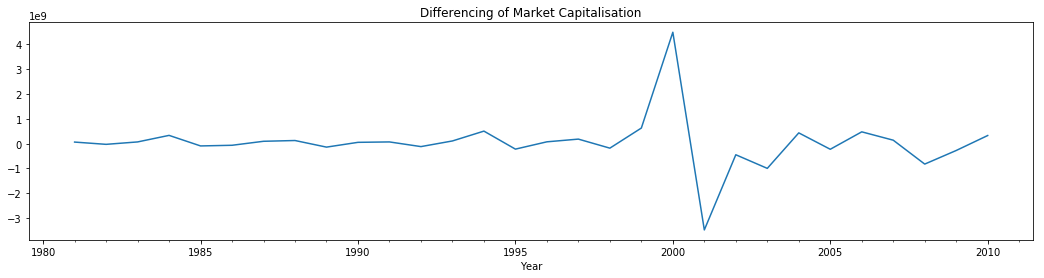

Year
1981-01-01     64198468.0
1982-01-01    -27151322.0
1983-01-01     70044635.0
1984-01-01    333894714.0
1985-01-01    -91357145.0
Freq: AS-JAN, Name: Market_Capitalization_Fiscal_Period_End, dtype: float64

In [67]:
train['Market_Capitalization_Fiscal_Period_End'].diff().dropna().plot(figsize=(18,4))
plt.title('Differencing of Market Capitalisation')
plt.show()
train['Market_Capitalization_Fiscal_Period_End'].diff().dropna().head()

In [68]:
#Dickey Fuller Test on data after differencing once
adfinput = adfuller(train['Market_Capitalization_Fiscal_Period_End'].diff().dropna())
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test    -7.2758
P-value                            0.0000
Used Lags                          0.0000
Number of comments used           29.0000
Critical Value (1%)               -3.6791
Critical Value (5%)               -2.9679
Critical Value (10%)              -2.6232
dtype: float64

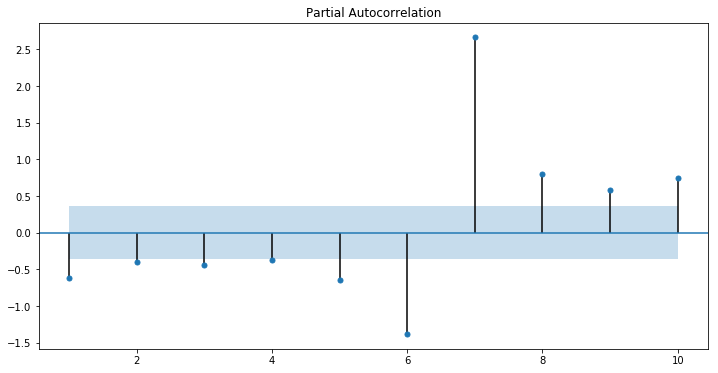

<Figure size 1008x432 with 0 Axes>

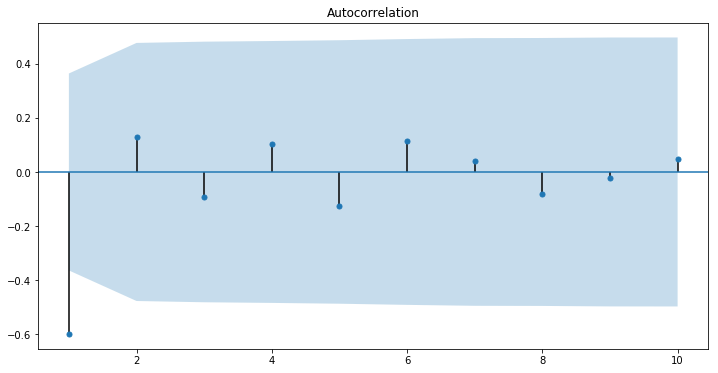

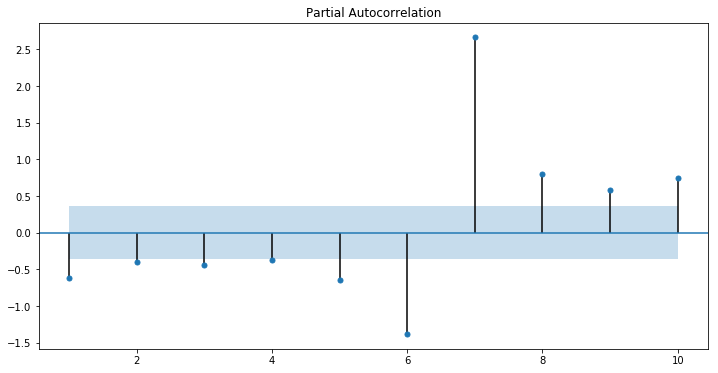

In [69]:
plt.figure(figsize=(14,6))
plot_acf(train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna(), lags=10, zero=False)
plot_pacf(train['Market_Capitalization_Fiscal_Period_End'].diff().diff().dropna(), lags=10, zero=False)

In [70]:
resDiff = sm.tsa.arma_order_select_ic(train.Market_Capitalization_Fiscal_Period_End, max_ar=10, max_ma=1, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (1, 0) is the best.


#### From the PACF Plot, it's not clear which Auto Regressive Lag is the best, so we find the one with the lowest AIC ####

In [71]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.Market_Capitalization_Fiscal_Period_End, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                         ARIMA Model Results                                         
Dep. Variable:     D.Market_Capitalization_Fiscal_Period_End   No. Observations:                   30
Model:                                        ARIMA(1, 1, 0)   Log Likelihood                -665.260
Method:                                              css-mle   S.D. of innovations     1031873842.547
Date:                                       Mon, 18 Nov 2019   AIC                           1336.519
Time:                                               17:23:42   BIC                           1340.723
Sample:                                           01-01-1981   HQIC                          1337.864
                                                - 01-01-2010                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [72]:
prd = model_fit.predict(start=datetime(2011,1,1), end=datetime(2015,1,1))
prd.iloc[:]=model_fit.forecast(5)[0]

#### Market Capitalisation Robustness Tests ####

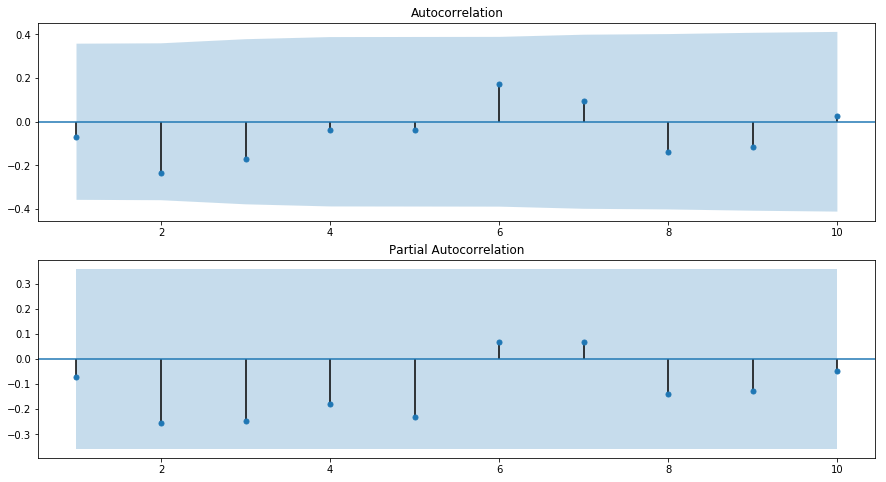

In [73]:
import statsmodels.api as sm
res = model_fit.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=10, ax=ax[0],zero=False)
fig = sm.graphics.tsa.plot_pacf(res, lags=10, ax=ax[1],zero=False)
plt.show()

#### From the above code, we can see that there is no significant correlations between the residuals, so this model is acceptable ####

In [74]:
sr=test['Market_Capitalization_Fiscal_Period_End']

In [75]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

arima_mape=mean_absolute_percentage_error(sr,prd[0:5])
ses_mape=mean_absolute_percentage_error(sr,SES1_pred1)
holt_mape=mean_absolute_percentage_error(sr,Holt2_pred)
winters_mape=mean_absolute_percentage_error(sr,winters_pred)
print("ARIMA_MAPE:",arima_mape,"ses_mape:",ses_mape,"holt_mape:",holt_mape,"winters_mape",winters_mape)

ARIMA_MAPE: 30.35214274015045 ses_mape: 29.632518923961843 holt_mape: 50.6795422968966 winters_mape 35.7741591117196


In [76]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_arima=sqrt(mean_squared_error(sr, prd[0:5]))
rmse_ses=sqrt(mean_squared_error(sr, SES1_pred1))
rmse_holt=sqrt(mean_squared_error(sr, Holt2_pred))
rmse_winters=sqrt(mean_squared_error(sr, winters_pred))
print("ARIMA_RMSE:",rmse_arima,"ses_rmse:",rmse_ses,"holt_rmse:",rmse_holt,"winters_rmse",rmse_winters)

ARIMA_RMSE: 1086096900.354501 ses_rmse: 1106718221.6161208 holt_rmse: 859285970.1432594 winters_rmse 546598654.8468391


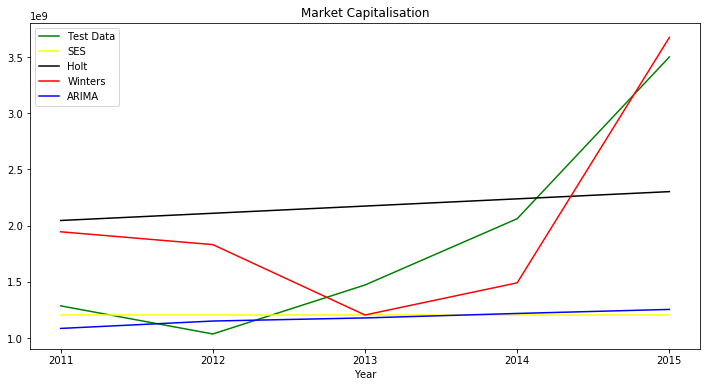

In [77]:
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Market Capitalisation')
#df.Market_Capitalization_Fiscal_Period_End.plot(style='--', color='green',legend=True)
test.Market_Capitalization_Fiscal_Period_End.plot(color='green',legend=True)
SES1_pred1.plot(color='yellow',legend=True)
Holt2_pred.plot(color='black',legend=True)
winters_pred.plot(color='red', legend=True)
prd.plot(color='blue',legend=True)
plt.legend(['Test Data','SES','Holt','Winters','ARIMA'])
#fit1.forecast(5).plot(color='blue', legend=True)
plt.show()

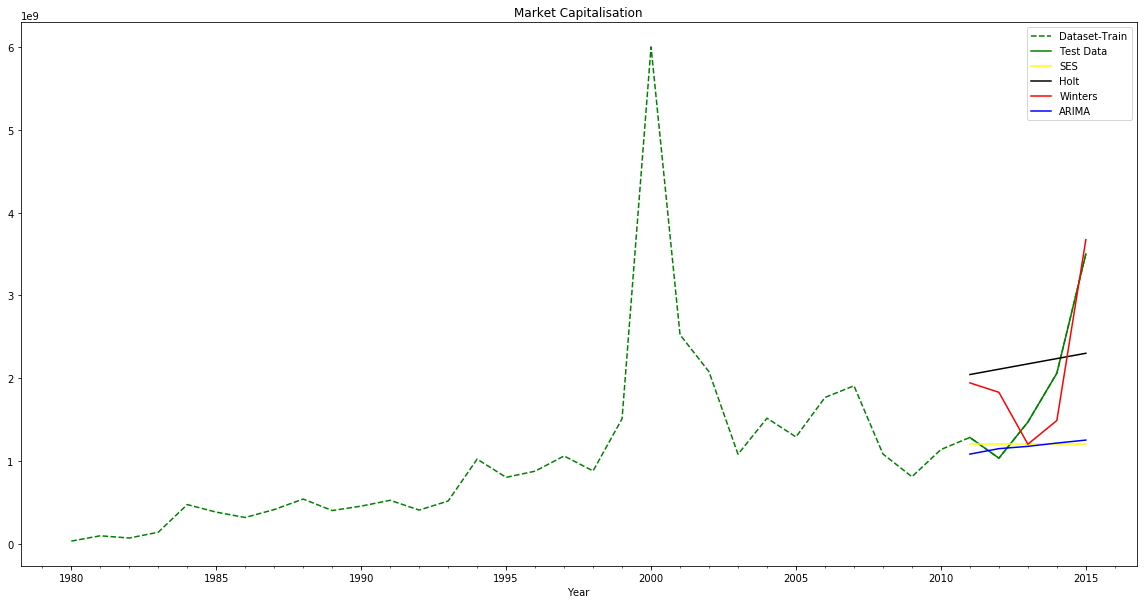

Forecasting Market Capitalisation using SES,Holt,Holt-Winters and ARIMA method


In [78]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Market Capitalisation')
df.Market_Capitalization_Fiscal_Period_End.plot(style='--', color='green',legend=True)
test.Market_Capitalization_Fiscal_Period_End.plot(color='green',legend=True)
SES1_pred1.plot(color='yellow',legend=True)
Holt2_pred.plot(color='black',legend=True)
winters_pred.plot(color='red', legend=True)
prd.plot(color='blue',legend=True)
plt.legend(['Dataset-Train','Test Data','SES','Holt','Winters','ARIMA'])
#fit1.forecast(5).plot(color='blue', legend=True)
plt.show()
print("Forecasting Market Capitalisation using SES,Holt,Holt-Winters and ARIMA method")

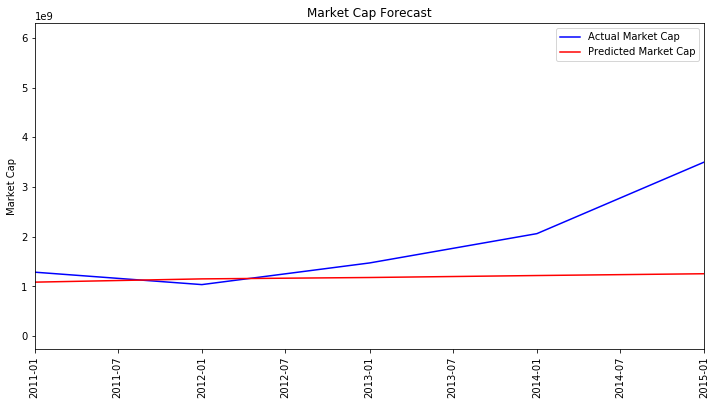

In [79]:
sr=pd.Series(df['Market_Capitalization_Fiscal_Period_End'])
plt.figure(figsize=(12,6))
prd = model_fit.predict(start=datetime(2011,1,1), end=datetime(2015,1,1))
prd.iloc[:]=model_fit.forecast(5)[0]
ax = plt.axes()
ax.plot(sr.index.values,sr, color='blue', label = "Actual Market Cap")        # specify color by name
ax.plot(prd.index.values, prd[0:], color='red', label = "Predicted Market Cap") 
ax.legend()
plt.xticks(rotation='vertical')

ax.set(xlim= [datetime(2011, 1, 1), datetime(2015, 1, 1)],
       ylabel='Market Cap',
       title='Market Cap Forecast')
plt.show()